# `Decalendar` and `Declock`

Martin Laptev

# Summary

`Decalendar` is a calendar system that aims to first peacefully co-exist
with, but then ultimately replace the [Gregorian
calendar](https://en.wikipedia.org/wiki/Gregorian_calendar). Similarly,
`Declock` is a timekeeping system designed to take the place of
[standard time](https://en.wikipedia.org/wiki/Standard_time). Instead of
months, weeks, hours, minutes, and seconds, `Decalendar` and `Declock`
use days as their base unit and derive other units from days using
metric, Roman, and Greek [numeral
prefixes](https://en.wikipedia.org/wiki/Numeral_prefix#Table_of_number_prefixes_in_English).
In essence, `Decalendar` units group days together, while `Declock`
units divide days up.

# At a glance

The main `Decalendar` date format consists of a year and a
day-of-the-year (`doty`) delimited by a plus sign (`year+day`). As shown
in [Figure 1](#fig-date), the last digit of the `doty` number is the
day-of-the-`dek` (`dotd`) number, which serves as both the
day-of-the-month (`dotm`) and the day-of-the-week (`dotw`) in
`Decalendar`. `Deks` are groups of 10 days that fulfill the role of both
months and weeks in `Decalendar`. The first two digits of the `doty` are
the `dek` number.

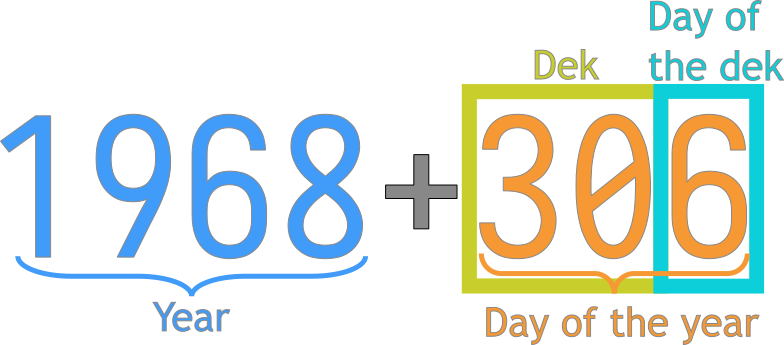

Each `dek` consists of 2 groups of 5 days called `pents.` Each `pent`
can follow a sequence of workdays and restdays called a `pently`
schedule. The code in [Example 1](#exm-glance) generates
[Figure 2](#fig-schedules) which compares the typical weekly schedule
and the `Schedule 3 pently` schedule. [Section 7.4.3.1](#sec-pently)
provides more information on the `pently` schedules. Like other `pently`
schedules, `Schedule 3` is named after the number of workdays it
contains. The 3 workdays in `Schedule 3` are followed by a 2-day
`pentend`, the `Decalender` equivalent of a weekend.

Unlike `Schedule 3` and the other `pently` schedules, the weekly
schedule is asymmetric and divides up workdays into proportions that are
easier to express as fractions: 3/8 (.375), 1/3 (.3̅), and 7/24 (0.2916̅).
In contrast, the proportions of the day in `pently` schedules are never
[repeating decimal](https://en.wikipedia.org/wiki/Repeating_decimal)
numbers. Each `Schedule 3` workday is split up symmetrically into
proportions so that workday starts at .3 (7.2 hours), lasts .4 (9.6
hours), and ends at .7 (16.8 hours).

<span class="theorem-title">**Example 1 **</span> 

``` python
import pandas as pd

ax = (
    pd.DataFrame(
        {
            "Days": ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"],
            "Evening rest": [7 / 24] * 5 + [0] * 2,
            "Work": [1 / 3] * 5 + [0] * 2,
            "Morning rest": [3 / 8] * 5 + [1] * 2,
        }
    )
    .set_index("Days")
    .plot.bar(
        stacked=True,
        color=["blue", "crimson", "blue"],
        title="Weekly schedule",
        fontsize=15,
        legend=False,
        xlabel="Days of the week",
        ylabel="Proportion of the day",
        rot=0,
        width=0.8,
    )
)
ax.invert_yaxis()
ax.legend(["Rest", "Work"], loc="upper right")
ax.patch.set_alpha(0)

for c in ax.containers:
    labels = [round(v.get_height(), 3) if v.get_height() > 0 else "" for v in c]
    labels = [str(l)[1:] for l in labels if l != 1]
    ax.bar_label(c, labels=labels, label_type="center", color="white", fontsize=15)

ax = (
    pd.DataFrame(
        {
            "Days": ["0 or 5", "1 or 6", "2 or 7", "3 or 8", "4 or 9"],
            "Evening rest": [0.3] * 3 + [0] * 2,
            "Work": [0.4] * 3 + [0] * 2,
            "Morning rest": [0.3] * 3 + [1] * 2,
        }
    )
    .set_index("Days")
    .plot.bar(
        stacked=True,
        color=["blue", "crimson", "blue"],
        title="Pently schedule",
        fontsize=15,
        legend=False,
        xlabel="Days of the dek",
        ylabel="Proportion of the day",
        rot=0,
        width=0.8,
    )
)
ax.invert_yaxis()
ax.legend(["Rest", "Work"], loc="upper right")
ax.patch.set_alpha(0)

for c in ax.containers:
    labels = [round(v.get_height(), 1) if v.get_height() > 0 else "" for v in c]
    labels = [str(l)[1:] for l in labels if l != 1]
    ax.bar_label(c, labels=labels, label_type="center", color="white", fontsize=18)
```

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: center;"><div class="output display_data"
width="50.0%" data-layout-align="center">
<p>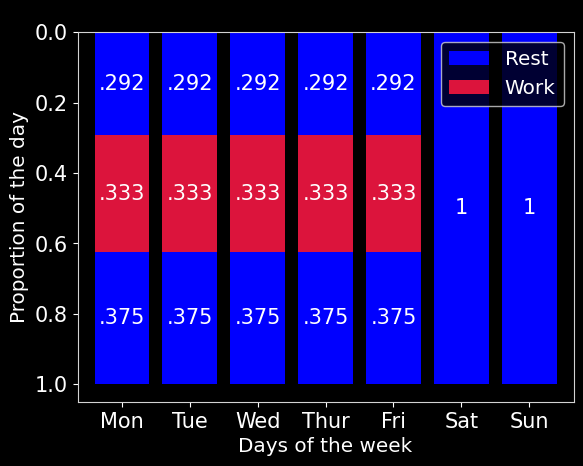</p>
</div></td>
<td style="text-align: center;"><div class="output display_data"
width="50.0%" data-layout-align="center">
<p>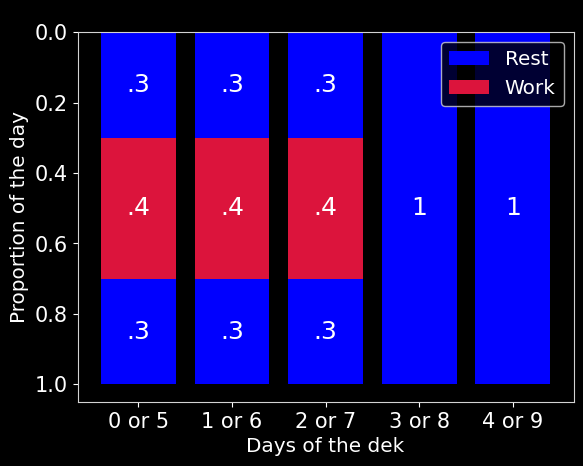</p>
</div></td>
</tr>
</tbody>
</table>

Figure 2: Weekly and pently schedule comparison

`Declock` uses proportions of the day instead of hours, minutes, or
seconds. [Figure 3](#fig-time) shows midnight, the first moment of a new
`Declock` day, with labels for the most important `Declock` units. More
information on `Declock` units is provided in [Section 4](#sec-unit).
Briefly, `Declock` time zones use `dimes`, `cents` are roughly a
quarter-hour, clocks and watches use `mils`, and `beats` fulfill the
role of seconds. The `Z` at the end of the time in [Figure 3](#fig-time)
is synonymous with `+0`, which means there is no time zone offset and
that the time is in `Zone 0` time zone.

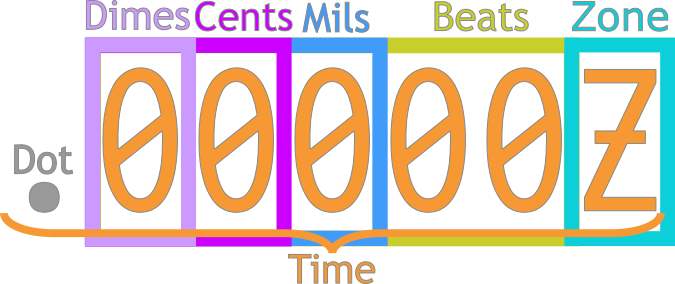

The top row of [Table 1](#tbl-2x2) shows how a `Declock` time
(`.00000Z`) can be appended to a `Decalendar doty` date (`306`) to form
a `Decalendar stamp`. If we prepend a year to a `doty` it becomes a
`Decalender` ordinal (`deco`) date, which is analogous to an [ISO 8601
ordinal (`isoo`)
date](https://en.wikipedia.org/wiki/ISO_8601#:~:text=Ordinal%20dates,-YYYY%2DDDD&text=An%20ordinal%20date%20is%20an,as%20%221981%2D095%22.).
Similarities between `Decalender` and the ISO 8601 international
standard for [dates](https://en.wikipedia.org/wiki/ISO_8601#Dates) and
[times](https://en.wikipedia.org/wiki/ISO_8601#Times) are discussed in
[Section 6.2](#sec-iso).

#### [Table 1](#tbl-2x2)

> **Click to toggle table expansion**
>
> |      | date     | stamp           |
> |------|----------|-----------------|
> | doty | 306      | 306.00000Z      |
> | deco | 1969+306 | 1969+306.00000Z |
>
> Table 1: Comparison of `doty` and `deco` dates and `stamps`

# Basic concepts

## Fractions analogy

In the simplest terms, `Decalendar` counts fractions of a year, while
`Declock` counts fractions of a day. The denominator for `Decalendar` is
the number of days in the year, and the `Declock` denominator is $10^x$,
where $x$ is the number of digits in the numerator. In both systems,
only the numerator, not the denominator, is provided. In the context
of`Decalendar`, the numerator is the days that have passed in the year,
while in the context of`Declock`, the numerator is the parts of the day
that have passed in the day.

To avoid any confusion between the two, we can say “Day 5” to mean the
date when 5 days have passed this year or `Day 0` to mean the first
day-of-the-year (`doty`). This is like the use of the term “day zero” in
other contexts, such as epidemiology. The analogous term for times is
`Dot`. The word `Dot` conveys that at its core `Declock` is a system
built on [fractional
days](https://en.wikipedia.org/wiki/Decimal_time#Fractional_days)
expressed as decimal numbers. The 5 in `Dot 5` can be thought of as a
number after a decimal (0.5) or a numerator (⁵/₁₀), either way it means
noon, the time when half the day has passed.

## Implied tolerance and duration

The analogy to decimals or fractions is important, because it explains
why adding a zero at the end of a time does not change the time, only
the implied tolerance of time points or the implied duration of time
intervals. If `Dot 5` is a time point, it has an implied tolerance of 5%
of the day ($.5±.05$), because any time after `Dot 45` and before
`Dot 55` ($[.45, .55)$) would round to `Dot 5`. On the other hand, if
`Dot 5` is the start time for a time interval, that interval is implied
to start at `Dot 5` and end before `Dot 6` ($[.5, .6)$) and thus have a
duration of 10% of the day (`Dot 6`-`Dot 5`). Every additional digit we
add decreases the implied tolerance and the implied duration 10-fold.

If we really want to insist on punctuality, we could include up to 5
digits in a time. Specifying times with more than 5 digits is possible,
and may be useful for scientific or technical purposes, but it is
analogous to providing [extremely long GPS
coordinates](https://xkcd.com/2170/); at some point the level of
precision stops having relevance to daily life. If we want to strive for
the highest level of precision possible, we can add the word “sharp” or
the `#` symbol to the time. Saying “5 Sharp” or writing `5#` means as
close as possible to noon. Times that include `#` cannot have an implied
duration. We can only add `#` to a time, so there is no need say “Dot 5
Sharp” or write `.5#`.

## Context clues

Not saying “Day” or “Dot” in general is acceptable, because it is
convenient and often the numbers make perfect sense in context. If
someone says “let’s have lunch at 5”, it is clear that they are
referring to noon (`Dot 5`) and not the sixth `doty` (`Day 5`). Also,
the number itself may provide a clue. Numbers greater than 365 could
still be a `doty`, but it would represent a day in an upcoming year, not
the current year. The meaning of such dates depends on whether the
current year is a common year (n=365) or a leap year (n=366). Saying
“500” could mean `Day 134` (if n=366) or `Day 135` (if n=365) of the
subsequent year, but it would most likely mean noon (`Dot 500`).

## Negative numbers

Every component of `Decalender` dates and `Declock` times can be
negative. A negative year is before 1 BCE (Before Common Era) and a
negative time zone is West of `Zone 0`. The year is usually provided
without a sign, because most people rarely discuss years before 1 BCE,
but numeric time zone offset must have a sign. Negative `doty` numbers
work like [zero-based
indexes](https://en.wikipedia.org/wiki/Zero-based_numbering) in
[computer
programming](https://en.wikipedia.org/wiki/Zero-based_numbering#Computer_programming)
in that they label the days of the year from $-N$ to $-1$, where $N$ is
the number of the days in the current year. The first `doty` is indexed
by both $0$ and $-N$, while the last `doty` is indexed by both $-1$ and
$N$.

In general, negative numbers show the number of parts that are left in
the whole. A negative `doty` shows how many days remain in the year and
a negative time [counts down](https://en.wikipedia.org/wiki/Countdown)
to the end of the day. To extend the fractions analogy in
[Section 3.1](#sec-frac) to negative numbers, the negative number added
to the whole gives us the numerator of the positive fraction
($pos = N + neg$). Positive and negative numbers arrive at the same
answer from opposite directions.

In certain contexts, the choice of using a negative number over a
positive number may mean that we want to emphasize how much time is left
instead of how much has passed. Even though `Dot -1` and `Dot 9` are
synonymous `Declock` times, the former could highlight that there is
only 1 tenth (⅒ or .1) of the day remaining before midnight. `Dot 5` and
`Dot -5` both mean noon, like saying that a glass is half-empty or
half-full.

## `Stamps`

If a `Decalender` date and a `Declock` time are combined, they form a
time `stamp`. The date always goes before the time in any `stamp`. When
said together, the numbers “0” and “5” mean the first `doty` (`Day 0`)
at noon (`Dot 5`). In written form, this would be `000.5`. This format
is called `.y`, which is read the same way as `doty`, but emphasizes
that the `.` is used in a floating point decimal `doty`. In other words,
`doty` can be used instead of “day of the year” in a sentence, whereas
`.y` indicates a `stamp`, such as `000.5`. Ideally, a `stamp` will
include all of the information needed to identify a singular point in
time, and thus should include a year and time zone.

## Specific dates and times

The `stamp` in [Section 3.5](#sec-stamp) assumes that the year and time
zone are known. A date without a year is like a time without a time
zone, both depend on the context. Most likely, we are talking about the
current year and the local time zone, but it may be unclear. Including a
year allows us to pinpoint a specific day, instead of a day that could
happen any year. Similarly, a time with a time zone occurs once every
day, rather than once in every time zone per day. The first `doty` of
1969, would be written `1969+000` and said “Year 1969 Day 0” or simply
“1969 0”, while midnight in `Zone 0` would be written `.000+0` and said
“Dot 0 Zone 0”, “0 Zone 0”, or “0 0”. Combined together, this date and
time form the `stamp 1969+000.000+0`.

# Units

The `stamp` in [Section 3.6](#sec-specific) use three digits for the
times because is the best level of precision for displaying time on
clocks and watches. While 3 digits are often best, `Declock` times can
have any number of digits, depending on the desired precision level.
`Declock` provides names for extremely precise time units, but the most
relevant units are within a few orders of magnitude from a day, which is
the base unit of both `Declock` and `Decalendar`. Listing the units of
each, as in [Table 2](#tbl-unit), highlights the relationship between
the two:

#### [Table 2](#tbl-unit)

> **Click to toggle table expansion**
>
> | Quantity           | Name     | Symbol   | Formal Name         |
> |--------------------|----------|----------|---------------------|
> | $100$              | `hekt`   | `ρ`      | `hectoday`          |
> | $91$               | `delt`   | `δ`      | `deltakeraiayear`   |
> | $90$               | `qop`    | `ϟ`      | `qoppaday`          |
> | $80$               | `pi`     | `π`      | `piday`             |
> | $73$               | `ep`     | `ε`      | `epsilonkeraiayear` |
> | $70$               | `om`     | `ο`      | `omicronday`        |
> | $61$               | `wau`    | `ϛ`      | `waukeraiayear`     |
> | $60$               | `xi`     | `ξ`      | `xiday`             |
> | $50$               | `nu`     | `ν`      | `nuday`             |
> | $40$               | `mu`     | `Μ`      | `muday`             |
> | $30$               | `lam`    | `λ`      | `lamdaday`          |
> | $20$               | `kap`    | `κ`      | `kappaday`          |
> | $10$               | `dek`    | `ι`, 旬  | `decaday`           |
> | $1$                | `day`    | `d`, 日  | `day`               |
> | $10^{-1}$          | `dime`   | `⅒`, 更  | `deciday`           |
> | $10^{-2}$          | `cent`   | `¢`, `%` | `centiday`          |
> | $10^{-3}$          | `mil`    | `m`, `‰` | `milliday`          |
> | $2 \times 10^{-4}$ | `period` | `.`      | `didecimilliday`    |
> | $10^{-4}$          | `phrase` | `◠`, `‱` | `decimilliday`      |
> | $2 \times 10^{-5}$ | `bar`    | `|`      | `dicentimilliday`   |
> | $10^{-5}$          | `beat`   | `♫`      | `centimilliday`     |
> | $10^{-6}$          | `mic`    | `μ`      | `microday`          |
> | $10^{-7}$          | `liph`   | `m̑`      | `decimicroday`      |
> | $10^{-8}$          | `lib`    | `m̈`      | `centimicroday`     |
> | $10^{-9}$          | `nan`    | `n`      | `nanoday`           |
> | $10^{-10}$         | `roph`   | `μ̑`      | `decinanoday`       |
> | $10^{-11}$         | `rob`    | `µ̈`      | `centinanoday`      |
> | $10^{-12}$         | `pic`    | `p`      | `picoday`           |
> | $10^{-13}$         | `noph`   | `n̑`      | `decipicoday`       |
> | $10^{-14}$         | `nob`    | `n̈`      | `centipicoday`      |
> | $10^{-15}$         | `femt`   | `f`      | `femtoday`          |
> | $10^{-16}$         | `coph`   | `p̑`      | `decifemtoday`      |
> | $10^{-17}$         | `cob`    | `p̈`      | `centifemtoday`     |
> | $10^{-18}$         | `att`    | `a`      | `attoday`           |
> | $10^{-19}$         | `foph`   | `f̑`      | `deciattoday`       |
> | $10^{-20}$         | `fob`    | `f̈`      | `centiattoday`      |
> | $10^{-21}$         | `zept`   | `z`      | `zeptoday`          |
> | $10^{-22}$         | `toph`   | `ȃ`      | `decizeptoday`      |
> | $10^{-23}$         | `tob`    | `ä`      | `centizeptoday`     |
> | $10^{-24}$         | `yokt`   | `y`      | `yoctoday`          |
> | $10^{-25}$         | `zoph`   | `z̑`      | `deciyoctoday`      |
> | $10^{-26}$         | `zob`    | `z̈`      | `centiyoctoday`     |
> | $10^{-27}$         | `ront`   | `r`      | `rontoday`          |
> | $10^{-28}$         | `yoph`   | `y̑`      | `decirontoday`      |
> | $10^{-29}$         | `yob`    | `ÿ`      | `centirontoday`     |
> | $10^{-30}$         | `quek`   | `q`      | `quectoday`         |
>
> Table 2: The units of `Decalendar` and `Declock`

In [Table 2](#tbl-unit), the units with positive exponents are used for
`Decalendar`, while the ones with negative exponents are used for
`Declock`. `Cents` (`¢`) can serve as a useful point of comparison to
understand the scale of some of the units in [Table 2](#tbl-unit) above,
because each `cent` is 1 percent of the day, which is about a quarter
hour (1% = 14.4 minutes). In comparison to `cents`, `mils` are ten times
smaller (.1% = 1.4 minutes), `dimes` (`⅒`) are ten times larger (10% =
144 minutes), and `deks` (`ι`) are 1000 times larger (1000% = 14400
minutes). To be clear, 1 `dek` contains 10 whole days while the other
units are fractions of days.

`Declock` units smaller than `mils` are not easy to think of as percents
of a day. For `phrases` (`◠`) and `beats` (`♫`), music serves as a much
more useful analogy. In fact, `phrases` and `beats` are musical terms.
The duration of a musical beat depends on the tempo, but a
`Declock beat` is always precisely 0.864 seconds long. This translates
to a tempo of 69.4̅ (69⁴/₉ or 625/9) beats per minute, which is
coincidentally also within the normal range of a resting heart rate.
`Declock beats` are organized into groups of 2 called `bars` or
`measures`, groups of 10 called `phrases`, and groups of 20 called
`periods`. A real example of music that follows this exact pattern is
Haydn’s [Feldpartita](https://en.wikipedia.org/wiki/Period_(music)).

`Declock` units smaller than `beats` are too small for typical daily
use. For example, a `mic` (`microday`, `μ`) is faster than a blink of an
eye. Each frame in a video playing at 60 frames per second will be shown
for about 1.93 `liphs` (`milliphrases`, `m̑`). A `lib` (`millibeat`, `m̈`)
is not enough time for a neuron in a human brain to fire and return to
rest. Sound can travel from a person’s ear to their other ear in about 7
`nans` (`nanodays`). Noticing that a sound reaches one ear before the
other can help humans to localize the source of the sound, but a `roph`
(`microphrase`, `μ̑`) difference might be too fast to notice. In a `rob`
(`microbeat`, `µ̈`), a USB 3.0 cable transferring 5 gigabytes per second
can send 4.32 kilobytes, the equivalent of a text file with 4320
characters.

# Time zones

Of the units discussed above, `dimes` are notable, because they are the
units of `Declock` time zones. The times in `Zone 1` are one `dime`
earlier than `Zone 0` and two `dimes` earlier than `Zone -1`. Time zones
are important, because different time zones could have very different
times and even different dates. Mexico City is in `Zone -3` and Tokyo is
in `Zone 4`, meaning for the majority of the day (`Dot 7` to be exact)
Tokyo is one day ahead of Mexico City. If it is noon on the last day of
the year 1999 in Mexico City, it will be `Dot 200` on the first day of
the year 2000 in Tokyo. This date and time in Mexico City can be written
`2000+000.200+4` or `2000-365.800+4`, while the equivalent date and time
for Tokyo is `1999+365.500-3` or `1999-001.500-3`. If we removed the
time zone from the end, we would not know that all of these `stamps`
describe the same moment in time.

`Declock` groups together the 26 [Coordinated Universal Time (UTC)
offsets](https://en.wikipedia.org/wiki/List_of_UTC_offsets) (-12:00 to
+14:00) into 11 time zones (`Zone -5` to `Zone 6`) by converting hours
into `dimes` ($dimes = hours \div 2.4$) and rounding to the nearest
whole number ($dimes = \lfloor hours \div 2.4 \rceil$). This time zone
system is simple and facilitates conversion, but locations on the edges
of the main time zones may experience a significant difference between
`Dot 5` and [solar noon](https://en.wikipedia.org/wiki/Noon#Solar_noon),
the point when the sun reaches its highest position in the sky.

If we decide to prioritize the amount of sunlight at `Dot 5` over
simplicity and ease of conversion, we could convert degrees of longitude
into `cents` or `mils`, instead of converting hours into `dimes`. For
example, we could say that Mexico City is in `Zone -275` instead of
`Zone -3`, because the longitude of Mexico City is 99 degrees West,
which translates to an offset of -275 `mils`
($mils = degrees \div .36$). Essentially, we could create as many
additional `Declock` time zones are desired simply by adding digits to
the end of each time zone. Adding one digit yields 110 double-digit
`cent` time zones, adding two digits creates 1100 triple-digit `mil`
time zones, and so on.

# Related systems

## Gregorian calendar

### Coordinate analogy

In the Gregorian calendar, dates are like a set of coordinates, where
the month and the day-of-the-month (`dotm`) are like longitude and
latitude in the [geographic coordinate
system](https://en.wikipedia.org/wiki/Geographic_coordinate_system) or x
and y in the [Cartesian coordinate
system](https://en.wikipedia.org/wiki/Cartesian_coordinate_system). The
`Decalendar` ordinal (`deco`) date format provides two coordinates in
one number: the day-of-the-year (`doty`). [Table 3](#tbl-greg2doty)
shows the `doty` number of all Gregorian calendar dates.

To locate a specific date in [Table 3](#tbl-greg2doty), first find the
month among the columns (think of the month as an x-axis value) and then
move down through the rows to the `dotm` (which is like a y-axis value).
To convert a `doty` number to a Gregorian calendar date, we first find
the `dek` number (the first two digits of the `doty`) among the rows in
[Table 4](#tbl-doty2greg) and then move to the right to the `dotd` (the
last digit of the `doty`). The dates in [Table 4](#tbl-doty2greg) are
shown in `mm-dd` format.

#### [Table 3](#tbl-greg2doty)

> **Click to toggle table expansion**
>
> | Day | Mar | Apr | May | Jun | Jul | Aug | Sep | Oct | Nov | Dec | Jan | Feb |
> |-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
> | 1   | 0   | 31  | 61  | 92  | 122 | 153 | 184 | 214 | 245 | 275 | 306 | 337 |
> | 2   | 1   | 32  | 62  | 93  | 123 | 154 | 185 | 215 | 246 | 276 | 307 | 338 |
> | 3   | 2   | 33  | 63  | 94  | 124 | 155 | 186 | 216 | 247 | 277 | 308 | 339 |
> | 4   | 3   | 34  | 64  | 95  | 125 | 156 | 187 | 217 | 248 | 278 | 309 | 340 |
> | 5   | 4   | 35  | 65  | 96  | 126 | 157 | 188 | 218 | 249 | 279 | 310 | 341 |
> | 6   | 5   | 36  | 66  | 97  | 127 | 158 | 189 | 219 | 250 | 280 | 311 | 342 |
> | 7   | 6   | 37  | 67  | 98  | 128 | 159 | 190 | 220 | 251 | 281 | 312 | 343 |
> | 8   | 7   | 38  | 68  | 99  | 129 | 160 | 191 | 221 | 252 | 282 | 313 | 344 |
> | 9   | 8   | 39  | 69  | 100 | 130 | 161 | 192 | 222 | 253 | 283 | 314 | 345 |
> | 10  | 9   | 40  | 70  | 101 | 131 | 162 | 193 | 223 | 254 | 284 | 315 | 346 |
> | 11  | 10  | 41  | 71  | 102 | 132 | 163 | 194 | 224 | 255 | 285 | 316 | 347 |
> | 12  | 11  | 42  | 72  | 103 | 133 | 164 | 195 | 225 | 256 | 286 | 317 | 348 |
> | 13  | 12  | 43  | 73  | 104 | 134 | 165 | 196 | 226 | 257 | 287 | 318 | 349 |
> | 14  | 13  | 44  | 74  | 105 | 135 | 166 | 197 | 227 | 258 | 288 | 319 | 350 |
> | 15  | 14  | 45  | 75  | 106 | 136 | 167 | 198 | 228 | 259 | 289 | 320 | 351 |
> | 16  | 15  | 46  | 76  | 107 | 137 | 168 | 199 | 229 | 260 | 290 | 321 | 352 |
> | 17  | 16  | 47  | 77  | 108 | 138 | 169 | 200 | 230 | 261 | 291 | 322 | 353 |
> | 18  | 17  | 48  | 78  | 109 | 139 | 170 | 201 | 231 | 262 | 292 | 323 | 354 |
> | 19  | 18  | 49  | 79  | 110 | 140 | 171 | 202 | 232 | 263 | 293 | 324 | 355 |
> | 20  | 19  | 50  | 80  | 111 | 141 | 172 | 203 | 233 | 264 | 294 | 325 | 356 |
> | 21  | 20  | 51  | 81  | 112 | 142 | 173 | 204 | 234 | 265 | 295 | 326 | 357 |
> | 22  | 21  | 52  | 82  | 113 | 143 | 174 | 205 | 235 | 266 | 296 | 327 | 358 |
> | 23  | 22  | 53  | 83  | 114 | 144 | 175 | 206 | 236 | 267 | 297 | 328 | 359 |
> | 24  | 23  | 54  | 84  | 115 | 145 | 176 | 207 | 237 | 268 | 298 | 329 | 360 |
> | 25  | 24  | 55  | 85  | 116 | 146 | 177 | 208 | 238 | 269 | 299 | 330 | 361 |
> | 26  | 25  | 56  | 86  | 117 | 147 | 178 | 209 | 239 | 270 | 300 | 331 | 362 |
> | 27  | 26  | 57  | 87  | 118 | 148 | 179 | 210 | 240 | 271 | 301 | 332 | 363 |
> | 28  | 27  | 58  | 88  | 119 | 149 | 180 | 211 | 241 | 272 | 302 | 333 | 364 |
> | 29  | 28  | 59  | 89  | 120 | 150 | 181 | 212 | 242 | 273 | 303 | 334 | 365 |
> | 30  | 29  | 60  | 90  | 121 | 151 | 182 | 213 | 243 | 274 | 304 | 335 |     |
> | 31  | 30  |     | 91  |     | 152 | 183 |     | 244 |     | 305 | 336 |     |
>
> Table 3: Gregorian calendar date to `doty` conversion

#### [Table 4](#tbl-doty2greg)

> **Click to toggle table expansion**
>
> | Dek | 0     | 1     | 2     | 3     | 4     | 5     | 6     | 7     | 8     | 9     |
> |-----|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
> | 0   | 03-01 | 03-02 | 03-03 | 03-04 | 03-05 | 03-06 | 03-07 | 03-08 | 03-09 | 03-10 |
> | 1   | 03-11 | 03-12 | 03-13 | 03-14 | 03-15 | 03-16 | 03-17 | 03-18 | 03-19 | 03-20 |
> | 2   | 03-21 | 03-22 | 03-23 | 03-24 | 03-25 | 03-26 | 03-27 | 03-28 | 03-29 | 03-30 |
> | 3   | 03-31 | 04-01 | 04-02 | 04-03 | 04-04 | 04-05 | 04-06 | 04-07 | 04-08 | 04-09 |
> | 4   | 04-10 | 04-11 | 04-12 | 04-13 | 04-14 | 04-15 | 04-16 | 04-17 | 04-18 | 04-19 |
> | 5   | 04-20 | 04-21 | 04-22 | 04-23 | 04-24 | 04-25 | 04-26 | 04-27 | 04-28 | 04-29 |
> | 6   | 04-30 | 05-01 | 05-02 | 05-03 | 05-04 | 05-05 | 05-06 | 05-07 | 05-08 | 05-09 |
> | 7   | 05-10 | 05-11 | 05-12 | 05-13 | 05-14 | 05-15 | 05-16 | 05-17 | 05-18 | 05-19 |
> | 8   | 05-20 | 05-21 | 05-22 | 05-23 | 05-24 | 05-25 | 05-26 | 05-27 | 05-28 | 05-29 |
> | 9   | 05-30 | 05-31 | 06-01 | 06-02 | 06-03 | 06-04 | 06-05 | 06-06 | 06-07 | 06-08 |
> | 10  | 06-09 | 06-10 | 06-11 | 06-12 | 06-13 | 06-14 | 06-15 | 06-16 | 06-17 | 06-18 |
> | 11  | 06-19 | 06-20 | 06-21 | 06-22 | 06-23 | 06-24 | 06-25 | 06-26 | 06-27 | 06-28 |
> | 12  | 06-29 | 06-30 | 07-01 | 07-02 | 07-03 | 07-04 | 07-05 | 07-06 | 07-07 | 07-08 |
> | 13  | 07-09 | 07-10 | 07-11 | 07-12 | 07-13 | 07-14 | 07-15 | 07-16 | 07-17 | 07-18 |
> | 14  | 07-19 | 07-20 | 07-21 | 07-22 | 07-23 | 07-24 | 07-25 | 07-26 | 07-27 | 07-28 |
> | 15  | 07-29 | 07-30 | 07-31 | 08-01 | 08-02 | 08-03 | 08-04 | 08-05 | 08-06 | 08-07 |
> | 16  | 08-08 | 08-09 | 08-10 | 08-11 | 08-12 | 08-13 | 08-14 | 08-15 | 08-16 | 08-17 |
> | 17  | 08-18 | 08-19 | 08-20 | 08-21 | 08-22 | 08-23 | 08-24 | 08-25 | 08-26 | 08-27 |
> | 18  | 08-28 | 08-29 | 08-30 | 08-31 | 09-01 | 09-02 | 09-03 | 09-04 | 09-05 | 09-06 |
> | 19  | 09-07 | 09-08 | 09-09 | 09-10 | 09-11 | 09-12 | 09-13 | 09-14 | 09-15 | 09-16 |
> | 20  | 09-17 | 09-18 | 09-19 | 09-20 | 09-21 | 09-22 | 09-23 | 09-24 | 09-25 | 09-26 |
> | 21  | 09-27 | 09-28 | 09-29 | 09-30 | 10-01 | 10-02 | 10-03 | 10-04 | 10-05 | 10-06 |
> | 22  | 10-07 | 10-08 | 10-09 | 10-10 | 10-11 | 10-12 | 10-13 | 10-14 | 10-15 | 10-16 |
> | 23  | 10-17 | 10-18 | 10-19 | 10-20 | 10-21 | 10-22 | 10-23 | 10-24 | 10-25 | 10-26 |
> | 24  | 10-27 | 10-28 | 10-29 | 10-30 | 10-31 | 11-01 | 11-02 | 11-03 | 11-04 | 11-05 |
> | 25  | 11-06 | 11-07 | 11-08 | 11-09 | 11-10 | 11-11 | 11-12 | 11-13 | 11-14 | 11-15 |
> | 26  | 11-16 | 11-17 | 11-18 | 11-19 | 11-20 | 11-21 | 11-22 | 11-23 | 11-24 | 11-25 |
> | 27  | 11-26 | 11-27 | 11-28 | 11-29 | 11-30 | 12-01 | 12-02 | 12-03 | 12-04 | 12-05 |
> | 28  | 12-06 | 12-07 | 12-08 | 12-09 | 12-10 | 12-11 | 12-12 | 12-13 | 12-14 | 12-15 |
> | 29  | 12-16 | 12-17 | 12-18 | 12-19 | 12-20 | 12-21 | 12-22 | 12-23 | 12-24 | 12-25 |
> | 30  | 12-26 | 12-27 | 12-28 | 12-29 | 12-30 | 12-31 | 01-01 | 01-02 | 01-03 | 01-04 |
> | 31  | 01-05 | 01-06 | 01-07 | 01-08 | 01-09 | 01-10 | 01-11 | 01-12 | 01-13 | 01-14 |
> | 32  | 01-15 | 01-16 | 01-17 | 01-18 | 01-19 | 01-20 | 01-21 | 01-22 | 01-23 | 01-24 |
> | 33  | 01-25 | 01-26 | 01-27 | 01-28 | 01-29 | 01-30 | 01-31 | 02-01 | 02-02 | 02-03 |
> | 34  | 02-04 | 02-05 | 02-06 | 02-07 | 02-08 | 02-09 | 02-10 | 02-11 | 02-12 | 02-13 |
> | 35  | 02-14 | 02-15 | 02-16 | 02-17 | 02-18 | 02-19 | 02-20 | 02-21 | 02-22 | 02-23 |
> | 36  | 02-24 | 02-25 | 02-26 | 02-27 | 02-28 | 02-29 |       |       |       |       |
>
> Table 4: `Doty` number to Gregorian calendar date conversion

### Gregorian calendar date conversion

In addition to using a conversion table like [Table 3](#tbl-greg2doty),
we can convert between Gregorian calendar dates and `Decalendar doty`
dates programmatically. The code in [Example 2](#exm-coor) is derived
from the
[`days_from_civil`](http://howardhinnant.github.io/date_algorithms.html#days_from_civil)
and
[`civil_from_days`](http://howardhinnant.github.io/date_algorithms.html#civil_from_days)
algorithms described by [Howard
Hinnant](https://howardhinnant.github.io/) in [*chrono-Compatible
Low-Level Date
Algorithms*](http://howardhinnant.github.io/date_algorithms.html)
\[-@hinnant2014\]. The output of the `greg2doty` function is a `doty`
number, while its inverse function, `doty2greg`, returns an array
containing a month and a `dotm` number.

<span class="theorem-title">**Example 2 **</span> 

#### JavaScript

##### `greg2doty`

``` {javascript}
#| tags: [greg2doty]
function greg2doty(month = 1, day = 1) {
    return Math.floor(
        (153 * (month > 2 ? month - 3 : month + 9) + 2) / 5 + day - 1
)}

greg2doty()
```

##### `doty2greg`

``` {javascript}
#| tags: [doty2greg]
function doty2greg(doty = 306) {
    const m = Math.floor((5 * doty + 2) / 153);
    return [Math.floor(m < 10 ? m + 3 : m - 9), Math.floor(doty - (153 * m + 2) / 5 + 2)];
}

doty2greg()
```

#### Julia

##### `greg2doty`

``` {julia}
#| tags: [greg2doty]
function greg2doty(month=1, day=1)
    Int(floor((153 * (month > 2 ? month - 3 : month + 9) + 2) / 5 + day - 1))
end

greg2doty()
```

##### `doty2greg`

``` {julia}
#| tags: [doty2greg]
function doty2greg(doty = 306)
    m = floor((5 * doty + 2) / 153);
    return Int(m < 10 ? m + 3 : m - 9), Int(floor(doty - (153 * m + 2) / 5 + 2))
end

doty2greg()
```

#### Python

##### `greg2doty`

``` {python}
#| tags: [greg2doty]
def greg2doty(month=1, day=1):
    return (153 * (month - 3 if month > 2 else month + 9) + 2) // 5 + day - 1

greg2doty()
```

##### `doty2greg`

``` {python}
#| tags: [doty2greg]
def doty2greg(doty=306):
    m = (5 * doty + 2) // 153
    return m + 3 if m < 10 else m - 9, doty - (153 * m + 2) // 5 + 1

doty2greg()
```

#### R

##### `greg2doty`

In [1]:
greg2doty <- function(month = 1, day = 1) {
    floor((153 * (ifelse(month > 2, month - 3, month + 9)) + 2) / 5 + day - 1)
}

greg2doty()

306

##### `doty2greg`

In [2]:
doty2greg <- function(doty = 306) {
    m <- floor((5 * doty + 2) / 153)
    c(ifelse(m < 10, m + 3, m - 9), floor(doty - (153 * m + 2) / 5 + 2))
}
doty2greg()

1 1

:::

### Gregorian calendar months and years

`Decalendar` only uses months for converting to and from Gregorian
calendar dates. Nevertheless, discussing months can help to explain how
`Decalendar` works. The `Decalendar` year ends with January and
February, as shown in [Table 5](#tbl-gregm). During these two months,
the `Decalendar` year is 1 less than the Gregorian calendar year. To
obtain a `Decalendar` year (`dy`) from a Gregorian calendar year (`gy`)
and month number (`gm`), we subtract 1 from `gy` if `gm` is less than 3
($dy = gy - [gm < 3]$). To obtain a Gregorian calendar year (`gy`) from
a `Decalendar` year (`dy`) and `doty`, we add 1 to `dy` if `doty` is
greater than 305 ($gy = dy + [dm > 305]$). Code to convert between
`Decalendar` and Gregorian calendar years is provided in
[Example 3](#exm-gregm).

#### [Table 5](#tbl-gregm)

> **Click to toggle table expansion**
>
> | dm  | gm  | Month     |
> |-----|-----|-----------|
> | 0   | 3   | March     |
> | 1   | 4   | April     |
> | 2   | 5   | May       |
> | 3   | 6   | June      |
> | 4   | 7   | July      |
> | 5   | 8   | August    |
> | 6   | 9   | September |
> | 7   | 10  | October   |
> | 8   | 11  | November  |
> | 9   | 12  | December  |
> | 10  | 1   | January   |
> | 11  | 2   | February  |
>
> Table 5: The numeric values of months in `Decalendar` and the
> Gregorian calendar

<span class="theorem-title">**Example 3 **</span> 

#### JavaScript

##### `greg2year`

``` {javascript}
#| tags: [greg2year]
function greg2year(year = 1970, month = 1) { return year - (month < 3) }

console.log(greg2year());
```

##### `doty2year`

``` {javascript}
#| tags: [doty2year]
function doty2year(year = 1969, doty = 306) { return year + (doty > 305) }

console.log(doty2year());
```

#### Julia

##### `greg2year`

``` {julia}
#| tags: [greg2year]
function greg2year(year=1970, month=1)
    year - (month < 3)
end

greg2year()
```

##### `doty2year`

``` {julia}
#| tags: [doty2year]
function doty2year(year=1969, doty=306)
    year + (doty > 305)
end

doty2year()
```

#### Python

##### `greg2year`

``` {python}
#| tags: [greg2year]
def greg2year(year=1970, month=1):
    return year - (month < 3)

greg2year()
```

##### `doty2year`

``` {python}
#| tags: [doty2year]
def doty2year(year=1969, doty=306):
    return year + (doty > 305)

doty2year()
```

#### R

##### `greg2year`

In [3]:
greg2year <- function(year = 1970, month = 1) {
    year - (month < 3)
}

greg2year()

1969

##### `doty2year`

In [4]:
doty2year <- function(year = 1969, doty = 306) {
    year + (doty > 305)
}

doty2year()

1970

:::

### Leap years

The first day of the `Decalendar` year, `Day 0`, is March 1 in the
Gregorian calendar. Starting the year on March 1 positions Leap Day,
`Day 365` in `Decalendar` and February 29 in the Gregorian calendar, at
the end of the year. `Decalendar` leap years therefore occur one year
earlier than Gregorian calendar leap years. To check if a year is a
`Decalendar` leap year, we add 1 to the year and proceed with the
[`leap_year`](http://howardhinnant.github.io/date_algorithms.html#is_leap)
algorithm as described by \[@hinnant2014\] and shown in
[Equation 1](#eq-gregl) and [Example 4](#exm-gregl).

<span id="eq-gregl">$$y \mod 4 = 0 \land year \mod 100 \neq 0 \lor year \mod 400 = 0 \qquad(1)$$</span>

<span class="theorem-title">**Example 4 **</span> 

#### JavaScript

##### `leap`

``` {javascript}
#| tags: [leap]
function leap_year(year = 1970) {
    return year % 4 == 0 && year % 100 != 0 || year % 400 == 0;
}

leap_year()
```

#### Julia

##### `leap`

``` {julia}
#| tags: [leap]
function leap_year(year=1970)
    year % 4 == 0 && year % 100 != 0 || year % 400 == 0
end

leap_year()
```

#### Python

##### `leap`

``` {python}
#| tags: [leap]
def leap_year(year=1970):
    return year % 4 == 0 and year % 100 != 0 or year % 400 == 0

leap_year()
```

#### R

##### `leap`

In [5]:
leap_year <- function(year = 1970) {
    year %% 4 == 0 & year %% 100 != 0 | year %% 400 == 0
}

leap_year()

FALSE

:::

## ISO 8601

### Years

Both `Decalendar` and [ISO 8601](https://en.wikipedia.org/wiki/ISO_8601)
dates show [years](https://en.wikipedia.org/wiki/ISO_8601#Years) as
4-digit numbers. Unlike ISO 8601, `Decalendar` does not require years to
be included in dates. As shown in [Table 1](#tbl-2x2), `Decalendar deco`
dates include years while `doty` dates do not. Year 0 in both
`Decalendar` and ISO 8601 is 1 BCE (Before Common Era) in the Gregorian
calendar. The first day of Year 0 in `Decalendar`, `0000+000`, is March
1, 1 BCE in the Gregorian calendar. The first day of Year 0 according to
ISO 8601 is `-0001+306` in `Decalendar` and January 1, 1 BCE in the
Gregorian calendar.

### Ordinal dates

`Deco` dates (`year+day`) are very similar to [ISO 8601 ordinal (`isoo`)
dates](https://en.wikipedia.org/wiki/ISO_8601#Ordinal_dates)
(`year-day`). Like `Decalendar doty` numbers, `isoo` dates count the
number of days since the start of the year. Unlike ordinal dates, `doty`
numbers are
[zero-based](https://en.wikipedia.org/wiki/Zero-based_numbering) and do
not differ across common and leap years. The `deco` date can be easily
obtained from the `isoo` date using the calculations shown in
[Equation 2](#eq-isoo1), [Equation 3](#eq-isoo2), and
[Example 5](#exm-isoo). These calculation shift the `isoo` date by 60 or
61 days to account for the 2-month difference between `Decalendar` and
the Gregorian calendar.

In [Example 5](#exm-isoo), the `isoo2doty` and `doty2isoo` functions
convert between ISO 8601 ordinal day numbers and `doty` numbers, while
the `isoo2year` and `doty2year` functions adjust the year if necessary.
We use the `leap_year` function from [Example 4](#exm-gregl) in
[Example 5](#exm-isoo) to correct for the fact that Leap Day shifts ISO
8601 ordinal day numbers by 1 day in leap years. To be clear, we only
have to take Leap Day into account when dealing with `isoo` dates.
`Decalendar doty` numbers are the same in common and leap years, because
Leap Day is at the end of the `Decalendar` year.

<span id="eq-isoo1">$$(isoordinal + 305 - isleap(year)) \mod 365 \qquad(2)$$</span>

<span id="eq-isoo2">$$(doty + 60 + isleap(year + 1)) \mod 365 \qquad(3)$$</span>

<span class="theorem-title">**Example 5 **</span> 

#### JavaScript

##### `isoo2doty`

``` {javascript}
#| tags: [isoo2doty]
function isoo2doty(yd = "1970-001") {
    const [year, day] = yd.includes("-") ? yd.split("-") : yd.split(/(?=\d{4})/);
    return [parseInt(year) - (parseInt(day) < (60 + leap_year(year - 1))),
        (parseInt(day) + 305 - leap_year(year)) % 365]
}

console.log(isoo2doty())
```

##### `isoo2deco`

``` {javascript}
#| tags: [isoo2deco]
function isoo2deco(yd = "1970-001") {
    const [year, doty] = isoo2doty(yd).map(i => i.toString())
    return `${year.padStart(4, "0")}+${doty.padStart(3, "0")}`
}

console.log(isoo2deco())
```

##### `doty2isoo`

``` {javascript}
#| tags: [doty2isoo]
function doty2isoo(year = 1969, doty = 306) {
    return `${doty2year(year, doty).toString().padStart(4, "0")}-${
    ((doty + 60 + leap_year(year + 1)) % 365).toString().padStart(3, "0")}`
}

console.log(doty2isoo());
```

#### Julia

##### `isoo2year`

``` {julia}
#| tags: [isoo2year]
function isoo2year(year = 1970, day = 1)
    year - (day < (60 + leap_year(year - 1)))
end

isoo2year()
```

##### `isoo2doty`

``` {julia}
#| tags: [isoo2doty]
function isoo2doty(year=1970, day=1)
    (day + 305 - leap_year(year)) % 365
end

"$(lpad(isoo2year(), 4, '0'))+$(lpad(isoo2doty(), 3, '0'))"
```

##### `doty2isoo`

``` {julia}
#| tags: [doty2isoo]
function doty2isoo(year=1970, doty=0)
    (doty + 60 + leap_year(year + 1)) % 365
end

"$(lpad(doty2year(), 4, '0'))+$(lpad(doty2isoo(), 3, '0'))"
```

#### Python

##### `isoo2year`

``` {python}
#| tags: [isoo2year]
def isoo2year(year=1970, day=1):
    return year - (day < (60 + leap_year(year - 1)))

isoo2year()
```

##### `isoo2doty`

``` {python}
#| tags: [isoo2doty]
def isoo2doty(year=1970, day=1):
    return (day + 305 - leap_year(year)) % 365

f"{isoo2year():>04}+{isoo2doty():>03}"
```

##### `doty2isoo`

``` {python}
#| tags: [doty2isoo]
def doty2isoo(year=1970, doty=0):
    return (doty + 60 + leap_year(year + 1)) % 365

f"{doty2year():>04}+{doty2isoo():>03}"
```

#### R

##### `isoo2year`

In [6]:
isoo2year <- function(year = 1970, day = 1) {
    year - (day < (60 + leap_year(year - 1)))
}

isoo2year()

1969

##### `isoo2doty`

In [7]:
isoo2doty <- function(year = 1970, day = 1) {
    (day + 305 - leap_year(year)) %% 365
}

paste0(sprintf("%04d", isoo2year()), "+", sprintf("%03d", isoo2doty()))

'1969+306'

##### `doty2isoo`

In [8]:
doty2isoo <- function(year = 1970, doty = 0) {
    (doty + 60 + leap_year(year + 1)) %% 365
}

paste0(sprintf("%04d", doty2year()), "+", sprintf("%03d", doty2isoo()))

'1970+060'

:::

### Calendar dates

ISO 8601 [calendar dates
(`isoc`)](https://en.wikipedia.org/wiki/ISO_8601#Calendar_dates) consist
of a four-digit year, a two-digit month, and a two-digit `dotm`
separated by hyphens (`year-mm-dd`). This format is the current widely
accepted standard for displaying Gregorian calendar dates. We can
combine code from [Example 2](#exm-coor) and [Example 3](#exm-gregm) to
convert between `deco` dates and `isoc` dates, as shown in
[Example 6](#exm-isoc). The code in [Example 6](#exm-isoc) formats the
output of the `greg2year` and `greg2doty` functions into `deco` dates
and the output of the `doty2year` and `doty2greg` functions into `isoc`
dates.

As mentioned in [Section 6.1.1](#sec-coor), `Decalendar` uses `doty`
numbers as dates instead of month and day-of-the-month (`dotm`) numbers,
but if required, Gregorian calendar dates can be provided in the
`Decalendar` calendar (`decc`, pronounced “deck-see”) format
(`year+m+dd`), which is very similar to the `isoc` date format. The
`decc` format is described in [Section 7.1](#sec-dotm). Examples of the
`decc` format are provided in [Section 7.3](#sec-dotex). To be clear,
the `decc` format is only used to display Gregorian calendar dates and
otherwise does not play any role in `Decalendar`.

<span class="theorem-title">**Example 6 **</span> 

#### JavaScript

##### `greg2deco`

``` {javascript}
#| tags: [greg2deco]
function greg2deco(year = 1970, month = 1, day = 1) {
    return `${greg2year(year, month).toString().padStart(4, "0")}+${
        greg2doty(month, day).toString().padStart(3, "0")}`;
}
```

##### `doty2isoc`

``` {javascript}
#| tags: [doty2isoc]
function doty2isoc(year = 1969, doty = 306) {
    return `${doty2year().toString().padStart(4, "0")}-${
        doty2greg().map(
            i => i.toString().padStart(2, "0")
        ).join("-")}`;
}
```

##### `greg2isoc`

``` {javascript}
#| tags: [greg2isoc]
function greg2isoc(year = 1970, month = 1, day = 1) {
    return `${year.toString().padStart(4, "0")}-${
        month.toString().padStart(2, "0")}-${
        day.toString().padStart(2, "0")}`;
}
```

#### Julia

##### `deco` date

``` {julia}
#| tags: [decdate]
"$(lpad(greg2year(), 4, '0'))+$(lpad(greg2doty(), 3, '0'))"
```

##### ISO 8601 date

``` {julia}
#| tags: [isodate]
"$(lpad(doty2year(), 4, '0'))-$(join(map((x) -> lpad(x, 2, '0'), doty2greg()), '-'))"
```

#### Python

##### `deco` date

``` {python}
#| tags: [decdate]
f"{greg2year():>04}+{greg2doty():<3}"
```

##### ISO 8601 date

``` {python}
#| tags: [isodate]
f"{doty2year():>04}-{'-'.join(map(lambda i: str(i).rjust(2, '0'), doty2greg()))}"
```

#### R

##### `deco` date

In [9]:
paste0(
    sprintf("%04d", greg2year()), "+",
    sprintf("%03d", greg2doty())
    )

'1969+306'

##### ISO 8601 date

In [10]:
paste0(sprintf("%04d", doty2year()), "-",
    paste(sprintf("%02d", doty2greg()), collapse = '-')
    )

'1970-01-01'

:::

### Time zones

`Isoc` dates can be combined with the [ISO 8601 time (`isot`)
format](https://en.wikipedia.org/wiki/ISO_8601#Times) (`hh:mm:ss`) to
form `isoc` timestamps. Likewise, `deco` dates can be combined with
`Declock` times to form `deco` timestamps. Both `deco`
(`year+day.dddddZ`) and `isoc` (`year-mm-ddThh:mm:ssZ`) timestamps can
end in a `Z`. This `Z` is a [military time zone
code](https://en.wikipedia.org/wiki/Military_time_zone#Description) that
represents the [UTC+00:00](https://en.wikipedia.org/wiki/UTC+00:00) time
zone, which is the basis of [Coordinated Universal Time
(UTC)](https://en.wikipedia.org/wiki/Coordinated_Universal_Time).

`Deco` timestamps that are synchronized with UTC can either end in `Z`
(`year+day.dddddZ`) or `+0` (`year+day.ddddd+0`). Noon UTC can be
written `.5Z` or `.5+0` in `Declock` and 12:00:00Z, 120000Z,
12:00:00+00, or 120000+00 as per ISO 8601. The code in
[Example 7](#exm-isoz) converts between UTC offsets and military time
zone codes. [Section 5](#sec-zone) provides more information on
`Declock` time zones.

<span class="theorem-title">**Example 7 **</span> 

#### JavaScript

##### hour2zone

``` {javascript}
#| tags: [hour2zone]
function hour2zone(hour = 0) {
    return hour == 0 ? "Z"
        : hour > 0 && hour < 10 ? String.fromCharCode(hour + 64)
        : hour > 9 && hour < 13 ? String.fromCharCode(hour + 65)
        : hour < 0 && hour > -13 ? String.fromCharCode(Math.abs(hour) + 77)
        : "J";
}

console.log(hour2zone(-new Date().getTimezoneOffset() / 60))
```

##### `zone2hour`

``` {javascript}
#| tags: [zone2hour]
function zone2hour(zone = "Z") {
    return (zone = zone.toUpperCase()) == "Z" ? 0
        : zone > "@" && zone < "J" ? zone.charCodeAt() - 64
        : zone > "J" && zone < "N" ? zone.charCodeAt() - 65
        : zone < "Z" && zone > "M" ? -(zone.charCodeAt() - 77)
        : zone;
}

console.log(zone2hour(hour2zone(-new Date().getTimezoneOffset() / 60)))
```

#### Julia

##### `hour2zone`

``` {julia}
#| tags: [hour2zone]
# import Pkg; Pkg.add("TimeZones")
# using TimeZones
# localzone()
function hour2zone(hour=0)
    (
        hour == 0 ? "Z" :
        hour > 0 && hour < 10 ? Char(hour + 64) :
        hour > 9 && hour < 13 ? Char(hour + 65) :
        hour < 0 && hour > -13 ? Char(abs(hour) + 77) : "J";
    )
end

hour2zone()
```

##### `zone2hour`

``` {julia}
#| tags: [zone2hour]
function zone2hour(zone="Z")
    (
        (zone = uppercase(string(zone))) == "Z" ? 0 :
        zone > "@" && zone < "J" ? Int(codepoint(only(zone))) - 64 :
        zone > "J" && zone < "N" ? Int(codepoint(only(zone))) - 65 :
        zone < "Z" && zone > "M" ? -(Int(codepoint(only(zone))) - 77) : zone;
    )
end

zone2hour()
```

#### Python

##### `hour2zone`

``` {python}
#| tags: [hour2zone]
# import time
# print(int(-time.timezone / 3600))
def hour2zone(hour=0):
    return (
        "Z" if hour == 0 else
        chr(hour + 64) if 0 < hour < 10 else
        chr(hour + 65) if 9 < hour < 13 else
        chr(abs(hour) + 77) if -13 < hour < 0 else "J"
    )

hour2zone()
```

##### `zone2hour`

``` {python}
#| tags: [zone2hour]
def zone2hour(zone="Z"):
    return (
    0 if (zone := zone.upper()) == "Z" else
        ord(zone) - 64 if "@" < zone < "J" else
        ord(zone) - 65 if "J" < zone < "N" else
        -(ord(zone) - 77) if "M" < zone < "Z" else zone
    )

zone2hour()
```

#### R

##### `hour2zone`

In [11]:
# Sys.timezone()
hour2zone <- function(hour = 0) {
    ifelse(hour == 0, "Z",
    ifelse(hour > 0 && hour < 10, intToUtf8(hour + 64),
    ifelse(hour > 9 && hour < 13, intToUtf8(hour + 65),
    ifelse(hour < 0 && hour > -13, intToUtf8(abs(hour) + 77), "J"))))
}

hour2zone()

'Z'

##### `zone2hour`

In [12]:
zone2hour <- function(zone = "Z") {
    ifelse((zone <- toupper(zone)) == "Z", 0,
    ifelse(zone > "@" && zone < "J", utf8ToInt(zone) - 64,
    ifelse(zone > "J" && zone < "N", utf8ToInt(zone) - 65,
    ifelse(zone < "Z" && zone > "M", -(utf8ToInt(zone) - 77), zone))))
}

zone2hour()

0

:::

### Times

The formula for conversion of standard time to `Declock` time is shown
in [Equation 4](#eq-isot1). The value of `x` in [Equation 4](#eq-isot1)
can be modified to obtain different units, which are displayed in
[Table 6](#tbl-isot). To convert `Declock` time into standard time, we
first convert into hours using [Equation 5](#eq-isot2) and the
appropriate `x` value from [Table 6](#tbl-isot). Then, we convert hours
into minutes with [Equation 6](#eq-isot3) and minutes into seconds with
[Equation 7](#eq-isot4). The `time2doty` and `doty2time` functions in
[Example 8](#exm-isot) uses these formulas to convert between standard
time and `Declock` time.

<span id="eq-isot1">$$declock = \frac{hour}{24} + \frac{minute}{1440} + \frac{second}{86400} \cdot 10^x \qquad(4)$$</span>

<span id="eq-isot2">$$hour = declock \cdot 24 \cdot 10^x \qquad(5)$$</span>

<span id="eq-isot3">$$minute = \frac{hour - \lfloor hour \rfloor}{60} \qquad(6)$$</span>

<span id="eq-isot4">$$second = \frac{minute - \lfloor minute \rfloor}{60} \qquad(7)$$</span>

#### [Table 6](#tbl-isot)

> **Click to toggle table expansion**
>
> | x   | units   |
> |-----|---------|
> | -1  | deks    |
> | 0   | days    |
> | 1   | dimes   |
> | 2   | cents   |
> | 3   | mils    |
> | 4   | phrases |
> | 5   | beats   |
> | 6   | mics    |
>
> Table 6: The powers of ten of units based on days

<span class="theorem-title">**Example 8 **</span> 

#### JavaScript

##### `time2doty`

``` {javascript}
#| tags: [time2doty]
function time2doty(hour = 1, minute = 0, second = 0) {
    return hour / 24 + minute / 1440 + second / 86400
}

console.log(time2doty())
```

##### `time2isot`

``` {javascript}
#| tags: [time2isot]
function time2isot(hour = 1, minute = 0, second = 0) {
    return hour / 24 + minute / 1440 + second / 86400
}

console.log(time2isot())
```

##### `doty2time`

``` {javascript}
#| tags: [doty2time]
function doty2time(doty = 1 / 24) {
    const hour = doty * 24,
        floorHour = Math.floor(hour),
        minute = (hour - floorHour) / 60,
        floorMinute = Math.floor(minute);
        return [floorHour, floorMinute, (minute - floorMinute) / 60]
}

console.log(doty2time())
```

#### Julia

##### `time`

##### `time2doty`

``` {julia}
#| tags: [time2doty]
function time2doty(hour=1, minute=0, second=0)
    hour / 24 + minute / 1440 + second / 86400
end

time2doty()
```

##### `doty2time`

``` {julia}
#| tags: [doty2time]
function doty2time(doty=1/24)
    hour = doty * 24
    floorHour = floor(hour)
    minute = (hour - floorHour) / 60
    floorMinute = floor(minute)
    return floorHour, floorMinute, (minute - floorMinute) / 60
end

doty2time()
```

#### Python

##### `time2doty`

``` {python}
#| tags: [time2doty]
def time2doty(hour=1, minute=0, second=0):
    return hour / 24 + minute / 1440 + second / 86400

time2doty()
```

##### `doty2time`

``` {python}
#| tags: [doty2time]
def doty2time(doty = 1/24):
    hour = doty * 24
    floorHour = hour.__floor__()
    minute = (hour - floorHour) / 60
    floorMinute = minute.__floor__()
    return floorHour, floorMinute, (minute - floorMinute) / 60

doty2time()
```

#### R

##### `time2doty`

In [13]:
time2doty <- function(hour = 1, minute = 0, second = 0) {
    hour / 24 + minute / 1440 + second / 86400
}

time2doty()

0.0416666666666667

##### `doty2time`

In [14]:
doty2time <- function(doty = 1 / 24) {
    hour <- doty * 24
    floorHour <- floor(hour)
    minute <- (hour - floorHour) / 60
    floorMinute <- floor(minute)
    c(floorHour, floorMinute, (minute - floorMinute) / 60)
}

doty2time()

1 0 0

:::

### Timestamps

`Decalendar` seeks to make months and weeks obsolete. Similarly,
`Declock` aims to deprecate hours, minutes, and seconds in favor of
[fractional
days](https://en.wikipedia.org/wiki/Decimal_time#Fractional_days)
(`.day`). `Deco` timestamps, which combine `Decalendar` dates and
`Declock` times, are more concise and easier to read than ISO 8601
timestamps. An `isoc` timestamp that includes seconds is 20 characters
long (`year-mm-ddThh:mm:ssZ`), while a `deco` timestamp with slightly
greater precision is only 15 characters long (`year+day.dddddZ`). ISO
8601 timestamps can omit delimiters except for the `T` which separates
the date and the time (`yearmmddThhmmssZ`). Without delimiters, `isoc`
timestamps become even more difficult to read and still cannot match the
brevity of `Decalendar` timestamps.

Coincidentally, an ISO 8601 ordinal (`isoo`) timestamp
(`year-dayThh:mm:ssZ`) without delimiters (`yeardayThhmmssZ`) is the
same length as a `deco` timestamp (`year+day.dddddZ`). `Deco` timestamps
cannot exist without delimiters, because removing the plus sign (`+`)
from a `deco` timestamp turns it into a `doty` number (`ddddddd.ddddd`).
If we removed the `+` from the `deco` timestamp `1969+306.00000`, we
would obtain the `doty` number `1969306.00000` would represent midnight
1969306 days from the beginning of the current year. The rules for
`deco` timestamp interpretation are summarized by the code in the
`deco2doty` function in [Example 14](#exm-unixp).

To create a `deco` timestamp, we can use the `doty2deco` or the
`greg2deco` functions as shown in [Example 9](#exm-isos). Similarly,
[Example 9](#exm-isos) also shows how to create an `isoc` timestamp with
the `doty2isoc` and `doty2isoc` functions. All of these timestamp
creation functions assume that the provided times are in the UTC+00:00
time zone or `Zone 0` and need to be adjusted to the provided time zone
by adding the appropriate time zone offset to the timestamp.
[Section 6.6.4](#sec-unixb) and [Section 6.6.5](#sec-unixp) further
discuss timestamps and provide functions for building, parsing, and
converting timestamps.

<span class="theorem-title">**Example 9 **</span> 

#### JavaScript

##### `doty2deco`

``` {javascript}
#| tags: [doty2deco]
function doty2deco(year = 1969, doty = 306, zone = 0) {
    return `${year.toString().padStart(4, "0")}+${
        doty.toString().padStart(3, "0")}`;
}
```

##### `time2doty`

``` {javascript}
#| tags: [time2doty]
function time2doty(hour = 1, minute = 0, second = 0) {
    return hour / 24 + minute / 1440 + second / 86400
}
```

##### `time2deco`

``` {javascript}
#| tags: [time2deco]
function time2deco(hour = 0, minute = 0, second = 0) {
    return (Math.round(time2doty(hour, minute, second)
        * 1e5) / 1e5).toString().padStart(5, '0')
}
```

##### `doty2time`

``` {javascript}
#| tags: [doty2time]
function doty2time(doty = 1 / 24) {
    const hour = doty * 24,
        floorHour = Math.floor(hour),
        minute = (hour - floorHour) / 60,
        floorMinute = Math.floor(minute);
        return [floorHour, floorMinute, (minute - floorMinute) / 60]
}

function doty2isoc(year, doty) {
    return `${greg2year(year, month).toString().padStart(4, '0')}+${
        greg2doty(month, day).toString().padStart(3, '0')}.${
        (Math.round(time2doty(hour, minute, second) * 1e5) / 1e5).toString().padStart(5, '0')}`
}
console.log(`${doty2year()}+${
        doty2greg().map(
        i => i.toString().padStart(2, "0")
        ).join("-")}T${doty2time().map(
        i => Math.round(i).toString().padStart(2, "0")
        ).join(":")}`)
```

#### Julia

##### `time`

##### `time2doty`

``` {julia}
#| tags: [time2doty]
function time2doty(hour=1, minute=0, second=0)
    hour / 24 + minute / 1440 + second / 86400
end

"$(lpad(greg2year(), 4, '0'))+$(lpad(greg2doty(), 3, '0')).$(
    lpad(Int(round(time2doty(0) * 1e5)), 5, '0')))"
```

##### `doty2time`

``` {julia}
#| tags: [doty2time]
function doty2time(doty=1/24)
    hour = doty * 24
    floorHour = floor(hour)
    minute = (hour - floorHour) / 60
    floorMinute = floor(minute)
    return floorHour, floorMinute, (minute - floorMinute) / 60
end


"$(lpad(doty2year(), 4, '0'))-$(join(
    map((x) -> lpad(x, 2, '0'
), doty2greg()), '-'))T$(join(
    map((x) -> lpad(Int(x), 2, '0'
), doty2time(0)), ':')))"
```

#### Python

##### `time2doty`

``` {python}
#| tags: [time2doty]
def time2doty(hour=1, minute=0, second=0):
    return hour / 24 + minute / 1440 + second / 86400

f"{greg2year():>04}+{greg2doty():>03}.{round(time2doty(0) * 1e6):>05}"
```

##### `doty2time`

``` {python}
#| tags: [doty2time]
def doty2time(doty = 1/24):
    hour = doty * 24
    floorHour = hour.__floor__()
    minute = (hour - floorHour) / 60
    floorMinute = minute.__floor__()
    return floorHour, floorMinute, (minute - floorMinute) / 60

(
    f"{doty2year():>04}-{'-'.join(map(lambda i: str(i).rjust(2, '0'), doty2greg()))}"
    f"T{':'.join(map(lambda i: str(round(i)).rjust(2, '0'), doty2time(0)))}"
)
```

#### R

##### `time2doty`

In [15]:
time2doty <- function(hour = 1, minute = 0, second = 0) {
    hour / 24 + minute / 1440 + second / 86400
}

paste0(
    sprintf("%04d", greg2year()), "+",
    sprintf("%03d", greg2doty()), ".",
    sprintf("%05d", round(time2doty(0) * 1e5)))

'1969+306.00000'

##### `doty2time`

In [16]:
doty2time <- function(doty = 1 / 24) {
    hour <- doty * 24
    floorHour <- floor(hour)
    minute <- (hour - floorHour) / 60
    floorMinute <- floor(minute)
    c(floorHour, floorMinute, (minute - floorMinute) / 60)
}

paste0(sprintf("%04d", doty2year()), "-",
    paste(sprintf("%02d", doty2greg()), collapse = "-"), "T",
    paste(sprintf("%02d", doty2time()), collapse = ":")
    )

'1970-01-01T01:00:00'

:::

### Time intervals

ISO 8601 specifies three methods of unequivocally representing [time
intervals](https://en.wikipedia.org/wiki/ISO_8601#Time_intervals),
`start/stop`, `start/span`, and `span/stop`. The `Decalendar`
equivalents of these three time interval representations are
`start:stop`, `start>span`, and `stop<span`. Notably, the `start/stop`
syntax is used in Google Calendar “Add to Calendar” links
(`https://calendar.google.com/calendar/render?action=TEMPLATE&dates=start/stop`).
Clicking on an “Add to Calendar” link opens an web browser interface for
adding an event to an online calendar. The `greg2link` and `doty2link`
functions in [Example 10](#exm-isoi) create such links for Google,
Outlook, Office 365, and Yahoo online calendars.

<span class="theorem-title">**Example 10 **</span> 

### Repeating time intervals

ISO 8601 time intervals can be made to repeat with the `Rn/` prefix
(`Rn/start/stop`, `Rn/start/span`, `Rn/span/stop`), where `n` is the
number of repetitions. Such [repeating time
intervals](https://en.wikipedia.org/wiki/ISO_8601#Repeating_intervals)
are always consecutive and never overlap. The first three 6-hour
intervals of 1970 could be written `R3/1970-01-01T00:00:00Z/T06` as per
ISO 8601. This time interval in `Decalendar` could be written
`1969+306>.75>.25>0`. Unlike ISO 8601, `Decalendar` allows for the
creation of non-consecutive and overlapping recurring intervals. If we
wanted to include 3-hour breaks in between the three 6-hour intervals,
we could write `1969+306>1>.25>.125`. Similarly, the three 6-hour
intervals could be made to overlap by 3 hours by writing
`1969+306>.5>.25<.125`.

The `Decalendar` time interval representations above are called
`spreads` and were inspired by the concept of [array
slicing](https://en.wikipedia.org/wiki/Array_slicing) from computer
programming. `Decalendar` allows for the use of both `slices`
(`start:stop:step`) and `spreads` (`start>span>split>space`) to create
time intervals. [Slicing of dates and
times](https://pandas.pydata.org/pandas-docs/version/1.1/user_guide/timeseries.html#indexing)
is fully implemented in the [Pandas Python
library](https://pandas.pydata.org/). The pandas code shown in
[Example 11](#exm-isor) uses slicing to obtain the start times of the
last three 6-hour intervals in 1970, which is `1970+305>.75>.25>0` in
`Decalendar` and `R3/1970-12-31T06:00:00Z/T06` as per ISO 8601.

<span class="theorem-title">**Example 11 **</span> 

``` {python}
#| tags: [intervals]
import pandas as pd

pd.date_range("1970", "1971", freq="6H")[-4:-1]
```

## French Republican calendar

### French Republican calendar *décades*

The [French Republican
calendar](https://en.wikipedia.org/wiki/French_Republican_calendar) and
`Decalendar` both organize days in groups of 10. A group of 10 days in
the French Republican calendar is called a *décade*, while a group of 10
days in `Decalendar` is called a `dek`. The names of the days in a `dek`
are derived from their
[zero-based](https://en.wikipedia.org/wiki/Zero-based_numbering)
cardinal numbers (zero, one, two…), whereas the days of the *décade* are
named after their ordinal numbers (first, second, third…).
[Table 7](#tbl-dotd) provides the cardinal numbers, one-letter codes,
names, and types of the days of the `dek` as well as the names of their
French Republican calendar equivalents.

#### [Table 7](#tbl-dotd)

> **Click to toggle table expansion**
>
> | \#  | Code | Name   | Type | French   |
> |-----|------|--------|------|----------|
> | 0   | N    | Nulday | work | primidi  |
> | 1   | U    | Unoday | work | duodi    |
> | 2   | D    | Duoday | work | tridi    |
> | 3   | T    | Triday | rest | quartidi |
> | 4   | Q    | Quaday | rest | quintidi |
> | 5   | P    | Penday | work | sextidi  |
> | 6   | H    | Hexday | work | septidi  |
> | 7   | S    | Sepday | work | octidi   |
> | 8   | O    | Octday | rest | nonidi   |
> | 9   | E    | Ennday | rest | décadi   |
>
> Table 7: The days of the `dek` and their French Republican calendar
> equivalents

### French Republican calendar time

The French Republican calendar and `Declock` both break the day down
into decimal portions. In `Declock`, a `dime` is a tenth (⅒) of a day, a
`cent` is a hundredth (10⁻²) of a day, a `mil` is a thousandth (10⁻³) of
a day, and a `beat` is a hundred thousandth (10⁻⁵) of a day, whereas the
French Republican calendar calls these units decimal hours, decimal
minutes, *décimes*, and decimal seconds, respectively.
[Table 8](#tbl-dime) shows the start times of each `dime` (⅒) in a day
and their equivalents in 24-hour and 12-hour standard time.

#### [Table 8](#tbl-dime)

> **Click to toggle table expansion**
>
> | ⅒   | 24-hour | 12-hour |
> |-----|---------|---------|
> | 0   | 00:00   | 12:00AM |
> | 1   | 02:24   | 2:24AM  |
> | 2   | 04:48   | 4:48AM  |
> | 3   | 07:12   | 7:12AM  |
> | 4   | 09:36   | 9:36AM  |
> | 5   | 12:00   | 12:00PM |
> | 6   | 14:24   | 2:24PM  |
> | 7   | 16:48   | 4:48PM  |
> | 8   | 19:12   | 7:12PM  |
> | 9   | 21:36   | 9:36PM  |
>
> Table 8: The start times of each `dime` in a day and their standard
> time equivalents

## Swatch Internet Time

[Swatch Internet
Time](https://en.wikipedia.org/wiki/Swatch_Internet_Time) uses the term
“.beats” to describe a thousandth of day (10⁻³). In `Declock`, a `beat`
is a hundred thousandth of a day (10⁻⁵), because this is the approximate
duration of a heartbeat or a beat of music. Another difference is that
Swatch Internet Time has only 1 time zone,
[UTC+1](https://en.wikipedia.org/wiki/List_of_UTC_offsets#UTC+01:00,_A),
limiting its utility outside of Central Europe or West Africa. `Declock`
has 11 main single-digit time zones, but can support as many time zones
as needed by adding additional digits. More information on `Declock`
time zones can be found in [Section 5](#sec-zone).

## Julian dates

Julian dates are the number of [fractional
days](https://en.wikipedia.org/wiki/Decimal_time#Fractional_days) since
`-4713+327.5`, which is noon on November 24, 4714 BC in the Gregorian
calendar and January 1, 4713 BC in the Julian calendar. Julian days
start at noon, whereas `Decalendar` days, and some [Julian day
variants](https://en.wikipedia.org/wiki/Julian_day#Variants), start at
midnight. Like Swatch Internet Time, Julian dates only use a single time
zone
([UTC+0](https://en.wikipedia.org/wiki/List_of_UTC_offsets#UTC%C2%B100:00,_Z)).
To obtain a `Declock` time from a Julian date, we subtract the Julian
day number ($\lfloor JD \rfloor$) from the Julian date ($JD$), add 0.5,
and then obtaining the remainder after dividing by 1 as shown in
[Equation 8](#eq-jd).

<span id="eq-jd">$$time = (JD - \lfloor JD \rfloor + .5) \mod 1 \qquad(8)$$</span>

## UNIX time

### Julian time conversion to UNIX time

While it is possible to convert Julian dates into `deco` dates and
`Declock` times, the official definition of `deco` dates and `Declock`
times is based on UNIX time. UNIX time is the number of seconds since
the UNIX Epoch, which is `1969+306.0` in `Decalendar` or midnight in the
[UTC+0](https://en.wikipedia.org/wiki/List_of_UTC_offsets#UTC%C2%B100:00,_Z)
time zone on January 1, 1970 in the Gregorian calendar. A day is exactly
86,400 seconds (100,000 `beats`) long in UNIX time, Julian dates, `deco`
dates, and `Declock` times. To obtain UNIX time from a Julian Date, we
subtract 2440587.5 from the Julian Date and multiply by 86400 as shown
in [Equation 9](#eq-unixj).

<span id="eq-unixj">$$unix = (JD − 2440587.5) \cdot 86400 \qquad(9)$$</span>

### UNIX time conversion to `deco` date

To calculate `deco` dates directly from UNIX time, we can use a
calculation adapted the 2014 article entitled [“chrono-Compatible
Low-Level Date
Algorithms”](http://howardhinnant.github.io/date_algorithms.html#civil_from_days)
by [Howard Hinnant](https://howardhinnant.github.io/) \[-@hinnant2014\].
Briefly, the seconds (or milliseconds) in UNIX time are first converted
to `days` ($days = seconds \div 86400$). Then, the `days` are used to
obtain the `era` ([Equation 10](#eq-era)), `day-of-era`
([Equation 11](#eq-doe)), `year` ([Equation 12](#eq-year)), and `doty`
([Equation 13](#eq-doty)).

<span id="eq-era">$$era = \frac{\begin{cases}days&{\text{if } days \geq 0;}\\days-146096&{\text{otherwise.}}\end{cases}}{146097} \qquad(10)$$</span>

<span id="eq-doe">$$doe = days - era \cdot 146097 \qquad(11)$$</span>

<span id="eq-year">$$year = \lfloor \frac{doe - \frac{doe}{1460} + \frac{doe}{36524} - \frac{doe}{146096}}{365} \rfloor + era * 400 \qquad(12)$$</span>

<span id="eq-doty">$$doty = \lfloor doe - (365 \cdot year + \frac{year}{4} - \frac{year}{100} + \frac{year}{400}) \rfloor \qquad(13)$$</span>

### UNIX time conversion to `Decalendar` timestamp

To obtain fractional days, we have to sum up all of the days in previous
years and subtract this sum from `days` to obtain the current
`Decalendar` ordinal (`deco`) timestamp as shown in
[Equation 14](#eq-unixt). The code in [Example 12](#exm-unixt) converts
UNIX time into a `deco` timestamp in the `Zone 0` time zone by passing
the current UNIX timestamp to the `unix2doty` function. If we call this
function without arguments (`unix2doty()`) the result will be the year
and `doty` of the UNIX Epoch: 1969 and 306. To see
[Example 12](#exm-unixt) in action, visit this
[CodePen](https://codepen.io/maptv/pen/oNJZeea) which displays the
current `deco` (`year+day.ddddd`) and `isoc` (`year-mm-ddThh:mm:ss`)
timestamps.

<span id="eq-unixt">$$time = year \cdot 365 + \sum_{n=1}^{year} \left[ \begin{array}{c}
y \mod 4 = 0 \\
\land y \mod 100 \neq 0 \\
\lor y \mod 400 = 0 \end{array} \right] \qquad(14)$$</span>

<span class="theorem-title">**Example 12 **</span> 

#### JavaScript

##### `unix2doty`

``` {javascript}
#| tags: [unix2doty]
function unix2doty(ms = 0) {
    const days = ms / 86400000 + 719468,
        doe = days - (era = Math.floor((days >= 0 ? days : days - 146096) / 146097)) * 146097,
        year = Math.floor((doe - doe / 1460 + doe / 36524 - doe / 146096) / 365) + era * 400;
    return [year, days - Math.floor(year * 365 + year / 4 - year / 100 + year / 400)];
}

const [year, doty] = unix2doty(Date.now());
console.log(
    `${year.toString().padStart(4, "0")}+${
    (day = Math.floor(doty)).toString().padStart(3, "0")}.${
    (Math.round((doty - day) * 1e5)).toString().padStart(5, "0")}+0`
    );
```

#### Julia

##### `unix`

##### `unix2doty`

``` {julia}
#| tags: [unix2doty]
function unix2doty(s=0, ms=0)
    days = s / 86400 + ms / 86400000 + 719468
    doe = days - (era = floor((days >= 0 ? days : days - 146096) / 146097)) * 146097
    year = Int(floor((doe - doe / 1460 + doe / 36524 - doe / 146096) / 365) + era * 400)
    year, days - floor(year * 365 + year / 4 - year / 100 + year / 400)
end

y, d = unix2doty(time())
day = Int(floor(d))
"$(lpad(y, 4, '0'))+$(lpad(day, 3, '0')).$(lpad(Int(round((d - day) * 1e5)), 5, '0'))+0"
```

#### Python

##### `unix2doty`

``` {python}
#| tags: [unix2doty]
from time import time

def unix2doty(s=0, ms=0):
    days = s / 86400 + ms / 86400000 + 719468
    doe = days - (era := (days if days >= 0 else days - 146096) // 146097) * 146097
    year = int((doe - doe / 1460 + doe / 36524 - doe / 146096) // 365 + era * 400)
    return year, days - (year * 365 + year / 4 - year / 100 + year / 400).__floor__()

y, d = unix2doty(time())
f"{y:>04}+{(day := d.__floor__()):>03}.{round((d - day) * 1e5):>05}+0"
```

#### R

##### `unix2doty`

In [17]:
unix2doty <- function(s = 0, ms = 0) {
    days = s / 86400 + ms / 86400000 + 719468
    doe = days - (era = floor(ifelse(days >= 0, days, days - 146096) / 146097)) * 146097
    year = floor((doe - doe / 1460 + doe / 36524 - doe / 146096) / 365) + era * 400
    c(year, days - floor(year * 365 + year / 4 - year / 100 + year / 400))
}

yd <- unix2doty(as.numeric(Sys.time()))

paste0(sprintf("%04d", yd[1]), "+",
       sprintf("%03d", (day = floor(yd[2]))), ".",
       sprintf("%05d", round((yd[2] - day) * 1e5)), "+0"
)

'2023+219.19564+0'

#### CopyQ

``` javascript
copyq:
function unix2doty(ms = 0) {
    const days = ms / 86400000 + 719468,
        doe = days - (era = Math.floor((days >= 0 ? days : days - 146096) / 146097)) * 146097,
        year = Math.floor((doe - doe / 1460 + doe / 36524 - doe / 146096) / 365) + era * 400;
    return [year, days - Math.floor(year * 365 + year / 4 - year / 100 + year / 400)];
}

const [year, doty] = unix2doty(Date.now()),
    datetime = `${year.toString().padStart(4, "0")}+${
    (day = Math.floor(doty)).toString().padStart(3, "0")}.${
    (Math.round((doty - day) * 1e5)).toString().padStart(5, "0")}+0`;

copy(datetime)
copySelection(datetime)
paste()
```

:::

### Building timestamps

The code in [Example 12](#exm-unixt) creates a `Decalendar` ordinal
(`deco`) timestamp from UNIX time. [Example 13](#exm-unixb) encapsulates
this code in a function called `unix2deco`. The `deco` timestamps
converted from UNIX time are all in the `Zone 0` time zone. To switch to
a different time zone, we should pass the year and `doty` we obtain from
the `unix2doty` function to the `doty2deco` function from
[Example 8](#exm-isot) along with the desired time zone.

<span class="theorem-title">**Example 13 **</span> 

#### JavaScript

##### `unix2deco`

``` {javascript}
#| tags: [unix2deco]
function unix2deco(ms = 0) {
    const [year, doty] = unix2doty(ms);
    return `${year.toString().padStart(4, "0")}+${
        (day = Math.floor(doty)).toString().padStart(3, "0")}.${
        (Math.round((doty - day) * 1e5)).toString().padStart(5, "0")}+0`
};

console.log(unix2deco())
```

#### Julia

##### `unix`

##### `unix2deco`

``` {julia}
#| tags: [unix2deco]
function unix2deco(s=0, ms=0)
    y, d = unix2doty(time())
    day = Int(floor(d))
    "$(lpad(y, 4, '0'))+$(lpad(day, 3, '0')).$(lpad(Int(round((d - day) * 1e5)), 5, '0'))+0"
end

unix2deco()
```

#### Python

##### `unix2deco`

``` {python}
#| tags: [unix2deco]
from time import time

def unix2deco(s=0, ms=0):
    y, d = unix2doty(time())
    return f"{y:>04}+{(day := d.__floor__()):>03}.{round((d - day) * 1e5):>05}+0"

unix2deco()
```

#### R

##### `unix2deco`

In [18]:
unix2deco <- function(s = 0, ms = 0) {
    yd <- unix2deco(as.numeric(Sys.time()))
    paste0(sprintf("%04d", yd[1]), "+",
           sprintf("%03d", (day = floor(yd[2]))), ".",
           sprintf("%05d", round((yd[2] - day) * 1e5)), "+0"
    )
}

unix2deco()

:::

### Parsing timestamps

To extract the components of a `Decalendar` timestamp, we can use the
`parse_dec` function in [Example 9](#exm-isos). Parsing timestamps is
the first step before any later processes such as timestamp arithmetic
or conversion between timestamp formats. The `parse_dec` function
returns a year, a `doty`, and a fractional day time zone offset. The
year and time zone offset can be omitted in the timestamp provided to
`parse_dec`. If not specified in the timestamp, the year is the current
year and the time zone offset is 0.

<span class="theorem-title">**Example 14 **</span> 

#### JavaScript

##### `parse_dec`

``` {javascript}
#| tags: [parse_dec]
function parse_dec(timestamp = "1969+306.00000Z") {
    const arr = timestamp.toString().split(/(?=[+-]|[a-zA-Z])/, 3);
    switch (arr.length) {
        case 1: return [unix2doty(Date.now())[0], parseFloat(arr[0]), 0];
        case 2: return (/^[a-zA-Z]+$/.test(arr[1]))
            ? [unix2doty(Date.now())[0], parseFloat(arr[0]), zone2hour(arr[1]) / 24]
            : [parseInt(arr[0]), parseFloat(arr[1]), 0];
    };
    return [parseInt(arr[0]), parseFloat(arr[1]), /^[a-zA-Z]+$/.test(arr[2])
        ? zone2hour(arr[2]) / 24
        : parseFloat(arr[2].replace(/([+-])/, "$1\."))];
}

console.log(parse_dec());
```

:::

# Dot formats

The `stamps` shown above are in the decimal days of the year (`.y`)
format, which is the main `Decalendar` format. In addition to the `.y`
format, there are 2 other supplemental `datetime` formats, which are
based on decimal days of the month (`decc`), and decimal days of the
week (`.w`). [Table 9](#tbl-format) summarizes the three decimal
day-of-the ( `dot` or `.`) formats:

#### [Table 9](#tbl-format)

> **Click to toggle table expansion**
>
> | Day of the | `.` | General Form      | Specific Example  |
> |------------|-----|-------------------|-------------------|
> | Year       | `y` | `year±day.day±z`  | `1999+365.500-3`  |
> | Month      | `m` | `year±m±dd.day±z` | `1999+B+29.500-3` |
> | Week       | `w` | `year±ww±d.day±z` | `1999+52+5.500-3` |
>
> Table 9: The three dot formats

In [Table 9](#tbl-format) , `day` is the 3-digit day of the year
(`doty`) number, `dd` is the 2-digit day of the month (`dotm`) number,
`d` is the 1-digit day of the week (`dotw`) number, and `.day` is the
time in `mils`.

## The `.m` format

The `m` in the `.m` format is the 1-digit month number and is the
double-digit `dotm`. To fit all of the months in a single digit, `m` is
in [hexadecimal](https://en.wikipedia.org/wiki/Hexadecimal) form (Base16
encoded). This means that the first 10 months are represented by the
numbers 0 through 9 ([zero-based
numbering](https://en.wikipedia.org/wiki/Zero-based_numbering)) while
the last two months of the year are represented by the letters “A” and
“B” instead of numbers. The `.m` format is similar to the [ISO8601
calendar date](https://en.wikipedia.org/wiki/ISO_8601#Calendar_dates)
format (year-mm-dd).

The [ordinal numerals](https://en.wikipedia.org/wiki/Ordinal_numeral) of
September, October, November, and December in `Decalendar` (Sep=7th,
Oct=8th, Nov=9th, Dec=10th) match the [numeral
prefixes](https://en.m.wikipedia.org/wiki/Numeral_prefix#Table_of_number_prefixes_in_English)
in their names (Sep=7, Oct=8, Nov=9, Dec=10). The `m` value of a month
is based on its cardinal number in `Decalendar`, which is 1 less than
its ordinal number (Sep=6, Oct=7, Nov=8, Dec=9).

To convert a double-digit Gregorian calendar month number (`mm`) into a
single-digit `Decalendar m` value, we subtract 3 if `mm` is greater than
2, add 9 if not, as shown in [Equation 15](#eq-dotm1), and then encode
into hexadecimal (Base16). To do the inverse (convert `m` to `mm`), we
decode from hexadecimal, add 3 to `m` values less than 10 and subtract 9
from other `m` values, as shown in [Equation 16](#eq-dotm2). After
hexadecimal encoding, January is represented by `A` and February is
represented by `B` (mnemonic: `jAn`=January, `feB`=February).

<span id="eq-dotm1">$$m = \begin{cases}mm - 3&{\text{if } month > 2;}\\mm + 9&{\text{otherwise.}}\end{cases} \qquad(15)$$</span>

<span id="eq-dotm2">$$m = \begin{cases}month + 3&{\text{if } month < 10;}\\month - 9&{\text{otherwise.}}\end{cases} \qquad(16)$$</span>

## The `decw` format

The week number in the `decw` format, `ww`, ranges from 0 to 53 or -54
to -1. Weeks in the `decw` format start from Sunday.
[Table 10](#tbl-dotw) shows the possible `dotw` values, which range from
0 to 6 or -7 to -1.

#### [Table 10](#tbl-dotw)

> **Click to toggle table expansion**
>
> | Day       | Pos | Neg |
> |-----------|-----|-----|
> | Sunday    | 0   | -7  |
> | Monday    | 1   | -6  |
> | Tuesday   | 2   | -5  |
> | Wednesday | 3   | -4  |
> | Thursday  | 4   | -3  |
> | Friday    | 5   | -2  |
> | Saturday  | 6   | -1  |
>
> Table 10: The weeks in the `decw` format

## Dot format examples

[Table 11](#tbl-dotex) builds on the example from [Section 5](#sec-zone)
to compare all three `.` formats. The 3 `.` formats differ only in their
approach to the date, not the time. Therefore, the times below are all
shown to 1-digit `dime` precision (same as time zones) instead of the
typical 3-digit `mil` precision. In Mexico City, the time is `+5-3` or
`-5-3`, while the time in London is `+8+0` or `-2+0` and time in Tokyo
is `+2+4` or `-8+4`.

#### [Table 11](#tbl-dotex)

> **Click to toggle table expansion**
>
> | Day of the | `.` | Mexico City     | London          | Tokyo           |
> |------------|-----|-----------------|-----------------|-----------------|
> | Year       | `y` | `1999+365.5-3`  | `1999+365.8-3`  | `2000+000.2+4`  |
> | Year       | `y` | `1999-001.5-3`  | `1999-001.2-3`  | `2000-365.8+4`  |
> | Month      | `m` | `1999+B+29.5-3` | `1999+B+29.8-3` | `2000+0+00.2+4` |
> | Month      | `m` | `1999-1-01.5-3` | `1999-1-01.2-3` | `2000-C-31.8+4` |
> | Week       | `w` | `1999+52+2.5-3` | `1999+52+2.8-3` | `2000+00+3.2+4` |
> | Week       | `w` | `1999-01-5.5-3` | `1999-01-5.2-3` | `2000-53-4.8+4` |
>
> Table 11: The time in Mexico City, London, and Tokyo in all three dot
> formats

In [Table 11](#tbl-dotex), the `.m` format tells us that the month in
Tokyo is January (`Month 0`) and the month in Mexico City and London is
December (`Month B`). We could say the `.m` dates in Mexico City and
London as “Year 1999 Month B Day 29” or “Year 1999 Month -1 Day -1” and
the Tokyo date as “Year 2000 Month 0 Day 0” or “Year 2000 Month -C Day
-31”.

The `decw` format always starts the year with `Week 0`, but the year can
start on any day of the week. [Table 11](#tbl-dotex) shows that the year
2000 starts on a Saturday (`Week 0 Day 6`). The `decw` dates in Mexico
City and London could be said “Year 1999 Week 52 Day 2” or “Year 1999
Week -1 Day -5”, while the date in Tokyo could be pronounced “Year 2000
Week 0 Day 3” or “Year 2000 Week -52 Day -4\`” in Tokyo.

In contrast to the `.m` and the `decw` formats, the dates in the `.y`
format are one character shorter and a little easier to say. The spoken
form of the `.y` date in Mexico City and London is “Year 1999 Day 365”
or “Year 1999 Day -1” and the spoken form of the Tokyo date is “Year
2000 Day 0” or “Year 2000 Day -365”.

## `Deks`

Even though it provides formats for months and weeks, `Decalendar`
envisions a world in which these units are replaced by `deks`. In terms
of scale, `deks` are somewhere between a week and a month, precisely
half a day less than a week and a half (1.5 weeks - 0.5 days) and
approximately a third of month. `Deks` could provide the functionality
of both weeks and months if we followed a `dekly` schedule instead of
`weekly` and `monthly` schedules. The transition to a `dekly` schedule
would be a massive undertaking, but could start with the creation of the
digital infrastructure needed for the new system. Every desktop and
mobile application that uses dates could be adapted to optionally use
`deks` instead of weeks and months.

### Days of the `dek`

A major difficulty with the Gregorian calendar is that the date is
disconnected from the day of the week. In contrast, the day of the `dek`
(`dotd`) is simply the last digit of the day number in the `.y` format.
For example, the first day of the year (`Day 0`) is always a `Nulday`,
the last day of common years (`Day 364`) is always an `Quaday`, and the
last day of leap years (`Day 365`) is always a `Penday`. The day number
allows us to distinguish workdays from restdays. `Decalendar` defines
`Triday`, `Quaday`, `Octday`, and `Ennday` as restdays, which means that
days with numbers that end in 3, 4, 8, or 9 are days off from work and
school. Each `dek` consists of 2 `pents` (`pentadays`), each `pent` has
3 workdays called the `trep` (`trepalium`) and 2 restdays called the
`pentend`. In total, there are 219 workdays and 146 restdays in a
`Decalendar` year, not counting the only obligatory holiday, Leap Day
(`Day 365`).

### Workdays

The Gregorian calendar has many more workdays, 260 in common years and
261 in leap year. Despite having many fewer workdays and many more
restdays, workers following `Decalendar` would actually spent slightly
more time at work overall, because the `Decalendar` workday goes from
`Dot 3` to `Dot 7` and thus is 4 `dimes` (9.6 hours) long, 6.6̅ `cents`
(96 minutes) longer than the typical 9-to-5 work schedule (`Dot 375` to
`Dot 7083̅`). In other words, this work schedule starts 75 `mils` (1.8
hours) earlier than 9AM (`Dot 375`) and ends 8.3̅ `mils` (12 minutes)
earlier than 5PM (`Dot 7083̅`). In a typical 40-hour workweek, workers
spend 23.80952381 `cents` per day at work on average, which adds up to
8.6̅ `deks` (260*8/240) per common year and 8.7 `deks` (261*8/240) per
leap year. In contrast, workers following `Decalendar` spend 24 `cents`
per day at work on average, which totals up to 8.76 `deks` (219\*.04)
spent at work every year. The default approach of `Decalendar` is to
compensate for having more restdays with longer workdays.

### Schedules

#### Pently schedules

If necessary, the length of the workday and the number of workdays in
the `dek` can be adjusted according to different schedules. As mentioned
above, each half of the `dek` is called a `pent`. Each `pent` can have
its own `pently` schedule. The expectation is that workers will work for
12 `dimes` per `pent`. It is possible to split those 12 `dimes` over the
course of 5, 4, 3, or 2 days in each `pent`. [Table 12](#tbl-pently)
displays how the number of workdays and restdays in a `pent` affects the
start time, end time, and duration of the workday. The different
`pently` schedules are named after the number of workdays per `pent`.
People can switch between `pently` schedules every `pent` as needed, but
unless there is a compelling reason to follow a different `pently`
schedule, everyone should follow the `Schedule 3` by default.
`Schedule 3` has 3 workdays and 2 restdays in each `pent`. Each
`Schedule 3` workday starts at `Dot 3`, ends at `Dot 7`, and lasts 4
`dimes`.

#### [Table 12](#tbl-pently)

> **Click to toggle table expansion**
>
> | Schedule | Workdays | Restdays | Start | End | Duration |
> |----------|----------|----------|-------|-----|----------|
> | 2        | 2        | 3        | .2    | .8  | .6       |
> | 3        | 3        | 2        | .3    | .7  | .4       |
> | 4        | 4        | 1        | .35   | .65 | .3       |
> | 5        | 5        | 0        | .38   | .62 | .24      |
>
> Table 12: The characteristics of the pently schedules

#### Daily schedules

`Decalendar` recommends waking up at `Dot 2` and going to bed at
`Dot 8`. This recommendation allots 4 `dimes` (9.6 hours) for falling
asleep and sleeping. To keep daily schedules symmetrical, the time spent
awake should be split evenly before and after work. People following
`Schedule 3` would thus have 10 `cents` (2.4 hours) to prepare for work
and another 10 `cents` to prepare for bed. [Table 13](#tbl-daily) shows
the recommended `Schedule 3` daily schedule. `Schedule 4` and
`Schedule 5` allot even more time, 15 `cents` (3.6 hours) and 18 `cents`
(4.32 hours), respectively, for before-work and after-work activities.
The recommended sleep schedule does not fit well with `Schedule 2`, but
this incompatibility does not have to result in a sleep deficit. If the
`Schedule 2` workdays are not consecutive, people following `Schedule 2`
can catch up on sleep on their days off by going to bed early before and
sleeping in after every workday.

#### [Table 13](#tbl-daily)

> **Click to toggle table expansion**
>
> | Start | End | Duration | Description                  |
> |-------|-----|----------|------------------------------|
> | .2    | .3  | .1       | Wake up and prepare for work |
> | .3    | .7  | .4       | Work                         |
> | .7    | .8  | .1       | End work and prepare for bed |
> | .8    | .2  | .4       | Go to bed and sleep          |
>
> Table 13: The workday schedule

## Subyear units

In addition to serving as a part of the Gregorian date coordinate system
described above, months can also indicate the current season or quarter.
`Deks` can also serve as indicator of subyear units like seasons.

### Seasons

We can use [Table 3](#tbl-greg2doty) to convert any Gregorian calendar
date to a positive `doty` number. This is especially useful for variable
dates that have to be converted every year. For example, the dates of
the solstices, the longest and shortest days of the year, vary slightly
every year. Instead of calculating the exact `doty` number of the
solstices ourselves we could translate from existing Gregorian calendar
dates. Solstices and equinoxes (the points in between the solstices) are
the basis of the some holidays, such as
[Nowruz](https://en.wikipedia.org/wiki/Nowruz).

The dates of the solstices and the equinoxes can be used as definitions
of the seasons. Each season has its opposite. The opposite of Spring is
Fall and the opposite of Summer is Winter. These opposites are always
occurring simultaneously, one opposing season in the Northern hemisphere
and the other in the Southern hemisphere. [Table 14](#tbl-soleq) lists
the opposing seasons in the North and South columns (which correspond to
the Northern and Southern hemispheres) and the approximate dates of the
solstices and the equinoxes that mark the start of each season.

#### [Table 14](#tbl-soleq)

> **Click to toggle table expansion**
>
> | Code | North  | South  | `doty` | `dotm` | Date         | Event              |
> |------|--------|--------|--------|--------|--------------|--------------------|
> | S0   | Spring | Fall   | 19     | 0+19   | March 20     | Northward Equinox  |
> | S1   | Summer | Winter | 111    | 3+19   | June 20      | Northward Solstice |
> | S2   | Fall   | Spring | 205    | 6+21   | September 22 | Southward Equinox  |
> | S3   | Winter | Summer | 295    | 9+20   | December 21  | Southward Solstice |
>
> Table 14: Solstice and equinox Gregorian calendar and `doty` dates

Using the information in [Table 14](#tbl-soleq), we can group the `deks`
and `pents` in a year according to the seasons in which they occur. We
identify `deks` using the first 2 digits of the 3-digit day number of
any day in that `dek`. The `pent` number is twice the `dek` number plus
one if the `dotd` is greater than 4 ($dek \cdot 2 + dotd > 4$). For
example, `Day 19` is the last day in `Dek 1` and `Pent 3`, while
`Day 111` is the second day in `Dek 11` and `Pent 22`.

We can round up the start of the first season and round down the start
of the second season to obtain the division of `pents` by season as
summarized in [Table 15](#tbl-season) It is important to note that the
last season starts in `Pent 59` of one year and ends with `Pent 3` of
the subsequent year. In common years, each season in
[Table 15](#tbl-season) has 18 `pents` (90 days), except for the season
in the second row, which has 19 `pents` (95 days). In leap years, the
season in the last row of [Table 15](#tbl-season) has 18.2 pents (91
days).

#### [Table 15](#tbl-season)

> **Click to toggle table expansion**
>
> | Code | North  | South  | First | Last | Duration |
> |------|--------|--------|-------|------|----------|
> | S0   | Spring | Fall   | 4     | 21   | 18       |
> | S1   | Summer | Winter | 22    | 40   | 19       |
> | S2   | Fall   | Spring | 41    | 58   | 18       |
> | S3   | Winter | Summer | 59    | 3    | 18       |
>
> Table 15: The `pents` that begin and end each season

### `Qops`, `Delts`, `Eps` and `Waus`

#### `Qops`

In contrast to the variable length of seasons, other `Decalendar` units
are constant length. Of these constant length units, `qops` (`qoppas`,
`ϟ`) are most like seasons. `Qops` divide the year into four parts, but
unlike seasons, `qops` do not include `Pent 72`, the last `pent` of the
year. `Pent 72` is not included in the last `qop` so that each `qop` is
9 `deks` and 90 days long. The omission of `Dek 36` also maintains the
pattern of alternating even and odd numbers in each row. This omission
leaves out only 5 or 6 days per year, because `Dek 36` overlaps with
`Dek 0`. [Table 16](#tbl-q) shows the division of `deks` by `qop`.

#### [Table 16](#tbl-q)

> **Click to toggle table expansion**
>
> | Code | First | Last |
> |------|-------|------|
> | Q0   | 0     | 8    |
> | Q1   | 9     | 17   |
> | Q2   | 18    | 26   |
> | Q3   | 27    | 35   |
>
> Table 16: The `deks` that begin and end each `qop`

#### `Delts`

In addition to `qops` shown above, `Decalendar` describes 3 other
similar units called `delts` (`deltas`, `δ`), `eps` (`epsilons`, `ε`),
and `waus` (`ϛ`). These units do not leave out as many days in each
year, because they split the year by day, rather than by `dek`. `Delts`,
`eps`, and `wau` split the year into 4, 5, and 6 parts, respectively.
`Delts` are 91 days long and leave out one day at the end of common
years and two days at the end of leap years. Just as above, leaving out
a small number of days at the end of the year preserves a pattern that
can be useful for remembering the days on which `delts` start and end.
[Table 17](#tbl-d) list the numbers of the days that begin and end each
`delt`. In [Table 16](#tbl-q), not only do rows alternate between even
and odd numbers, but the `delt` number is the last digit of both the
start and the end day of the `delt`.

#### [Table 17](#tbl-d)

> **Click to toggle table expansion**
>
> | Code | First | Last |
> |------|-------|------|
> | D0   | 0     | 90   |
> | D1   | 91    | 181  |
> | D2   | 182   | 272  |
> | D3   | 273   | 363  |
>
> Table 17: The days that begin and end each `delt`

#### `Eps`

Unlike `delts`, `eps` are 73 days long and do not leave out any days
from common years. `Qops`, `delts`, and `eps` all leave out leap days in
leap years. [Table 18](#tbl-e) list the numbers of the days that begin
and end each `ep`.

#### [Table 18](#tbl-e)

> **Click to toggle table expansion**
>
> | Code | First | Last |
> |------|-------|------|
> | E0   | 0     | 72   |
> | E1   | 73    | 145  |
> | E2   | 146   | 218  |
> | E3   | 219   | 291  |
> | E4   | 292   | 364  |
>
> Table 18: The days that begin and end each `ep`

#### `Waus`

The only unit that can include the leap year is a `wau` (`ϛ`), which is
61 days long and follows a similar pattern as a `delt`, except the last
`wau` in common years is 1 day short than all the others.
[Table 19](#tbl-w) list the numbers of the days that begin and end each
`wau`. As with `delts`, the `wau` number is the last digit of the
numbers of its first and last day.

#### [Table 19](#tbl-w)

> **Click to toggle table expansion**
>
> | Code | First | Last |
> |------|-------|------|
> | W0   | 0     | 60   |
> | W1   | 61    | 121  |
> | W2   | 122   | 182  |
> | W3   | 183   | 243  |
> | W4   | 244   | 304  |
> | W5   | 305   | 365  |
>
> Table 19: The days that begin and end each `wau`

All of the subyear unit codes can be preceded by a year and followed by
a day number. The midpoint of common years is noon on the first day of
`Delt 2`, `D2+00.5` or `+182.5`, and the midpoint of leap years is
midnight of the first day of `Wau 3`, `W3+00.0` or `+183.0`. The first
day of Spring in northern hemisphere and Fall in the southern hemisphere
in the year 2000 is `2000S0+00` or `2000+020`, while the last day of
this season is `2000S0+89` or `2000+109`. The subyear units are
essentially date intervals, series of contiguous dates. `Decalendar`
includes very powerful approaches to describing series of dates, times,
and `stamps`.

# Series

A single `doty` number, such as `Day 0`, implies a duration on 1 day. We
can indicate a duration of multiple days by listing consecutive days in
a `series`. A `series` consists of dates, times, or `stamps` separated
by commas (`,`). The items in a `series` should all be of the same type.
In other words, `series` should be homogeneous and not mix dates, times,
and `stamps`. The first 3 days of the year in the form of a `series`
would be written `0,1,2`, while the last three days would be `-3,-2,-1`.
The first half a day, from midnight to noon, could be written
`0,.1,.2,.3,.4`.

## Slices

Instead of listing every single day in a `series`, we can “slice” from
`Day 0` up to but not including `Day 3` by writing `:3`. `Simple slices`
consist of a `start` and a `stop` separated by a colon (`start:stop`).
When the `start` is omitted, `slices` begin at the first value, which in
the context of a year is `Day 0` and in the context of a day is
midnight. Therefore, writing `:3` is the same as writing `0:3`, both
represent the first 3 days of the year: `0,1,2`. Using this approach, we
can shorten the series `0,.1,.2,.3,.4` to `:.5`. If we omit the `stop`,
instead of the `start`, we would “slice” up to and including the last
value.

In the context of `doty` dates, omitting the `stop` value obtains all of
the days in the year after the `start`, because the default `stop` is
the number of days in the year (`n`). For example, the `slice 3:` has a
`start` of `Day 3` and a `stop` of `n`, and thus represents every day in
the year except the first 3. The number of items we obtain from a
`slice` is called a `span`. To calculate the `span`, we subtract the
`start` from the `stop` ($stop-start$). In a common year, the `span` of
`003:` is $n-3=362$, while in a leap year it would be $n-3=363$. If both
the `start` and the `stop` are omitted, every day is included
($span=n-0$). [Table 20](#tbl-4slice) lists the seasons, `qops`, and
`delts` in the form of `slices`. The superscript plus sign (⁺) in
[Table 20](#tbl-4slice) indicates a number that has to be incremented in
leap years.

#### [Table 20](#tbl-4slice)

> **Click to toggle table expansion**
>
> | Index | Season   | Qop     | Delt    |
> |-------|----------|---------|---------|
> | 0     | 20:110   | :90     | :91     |
> | 1     | 110:205  | 90:180  | 91:182  |
> | 2     | 205:354  | 180:270 | 182:273 |
> | 3     | 295:385⁺ | 270:360 | 273:364 |
>
> Table 20: The slices that represent the 4-part subyear units

## Steps

The `simple slices` (`start:stop`) described above are a type of time
`segment`, an unbroken time interval. To break up a `simple slice` into
a non-consecutive `series`, we can add a `step` value and create a
`stepped slice` (`start:stop:step`). `Stepped slices` move in
`step`-sized “steps” starting from `start`, skipping over $step-1$ items
with each “step”, keeping only items that are “stepped” on.

In other words, `stepped slices` keep items whose index (zero-based
position) in the `slice` is evenly divisible by `step`. A `step` value
of 1 keeps every item, because every index is divisible by 1, and a
`step` of 2 keeps every other item, those with even-numbered indexes.
`Day 0` and every other third day in the year thereafter (`Day 3`,
`Day 6`, etc.) can be represented by the `slice ::3`.

To create a `series` of times on days throughout the year, we can use a
`slice` with a `series` of `steps`. The `slice :365:1,1,3` represents
all of the `Decalendar` workdays in a year. It is necessary to specify
365 as the `stop`, so that Leap Day (`Day 365`) is not included as a
workday in leap years. Similarly, `3::1,4` is a `seq` that represents
all of the regular restdays, not including the Leap Day holiday.

`Stepped slices` cannot be included in `series`, because both use commas
(`,`) and it would not possible to differentiate a `series` of `steps`
from subsequent items in the `series`. The simple rule is that `slices`
with more than 1 colon (`:`) cannot be part of a series. For example,
`:365:1,1,3` is a `stepped slice` with a `series` of 3 `steps` rather
than a series consisting of a `slice` and two numbers.

## Spreads

To create `series` of consecutive items with breaks in between, it may
be better to use a `spread` than a `slice`. `Simple spreads` consist of
either a `start` and a `span` (`start>span`) separated by a greater-than
sign (`>`) or a `stop` and a `span` (`stop<span`) separated by a
less-than (`<`) sign. The default `start` and `stop` values are the same
for both `slices` and `spreads`. We can `spread` forward from the
default `start` to capture the first `span` days in a year. For example,
the first 3 days in a year can be represented by the `spread >3`, which
is synonymous with the `slice :3`. In this example, the `start` is 0,
while the `stop` and the `span` are both 3. In addition to default
`start` and `stop` values, `spreads` also have default `span` values. A
`spread` that only uses default values (`>` or `<`) will include every
day in the year ($span=n$). [Table 21](#tbl-4spread) lists the seasons,
`qops`, and `delts` in the form of `spreads`.

#### [Table 21](#tbl-4spread)

> **Click to toggle table expansion**
>
> | Index | Season   | Qop     | Delt    |
> |-------|----------|---------|---------|
> | 0     | 20\>90   | \>90    | \>91    |
> | 1     | 110\>95  | 90\>90  | 91\>91  |
> | 2     | 205\>90  | 180\>90 | 182\>91 |
> | 3     | 295\>90⁺ | 270\>90 | 273\>91 |
>
> Table 21: The spreads that represent the 4-part subyear units

If we “spread” forward from a positive `start`, the default `span` is
$n-start$. If we spread backward from a positive `stop`, the default
`span` is `stop`. We can `spread` backward from the default `stop` to
capture the last `span` days in a year. For example, `<3` represents the
last 3 days of any year. We could also use a negative `start` of `-3`,
the third to last day of any year, to create the `slice -3:` and the
`spread -3>`, both of which are synonymous with `<3`. One advantage of
`spreads` over `slices` is the ability to access days from the end of a
year without negative numbers. A `span` value of zero does not return
any items. Negative `span` values reverse the direction of the first
sign, turning `start` into `stop` and vice versa.

## Splits

As with `stepped slices`, we can create non-consecutive `series` by
“splitting” a `simple spread` (`start>span` or `stop<span`) into
`split spread` (e.g. `start>span>split`) with a `split` value that works
like the opposite of a `step`. While `steps` keep items that are
“stepped” on, `splits` exclude items that are used to create the
boundaries of the `splits`. The default `split` value is `span`, meaning
that the entire `span` is included in one `split`.

A `split spread` with a `split` value of 1 (`start>span>1`) is the same
as a `stepped slice` with a `step` value of 2 (`start:stop:2`). `Split`
values greater than 1 but less than `span` will yield a `series` of
`segments`. If `split` is zero (`start>span>0`), the `split spread` will
not return any items. A negative `split` value reverses the direction of
the second greater-than sign (`start>span>-2` and `start>span<2` are
synonymous). This can be useful when providing a series of `split`
values. Negative `split` values reverse the direction of a `split` and a
`split` value of zero skips a `split`. Just like `stepped slices`,
`split spreads` cannot be included in a `series`, because every `split`
can have a `series` of values.

The direction of the second sign in `split spreads` determines whether
we begin creating splits from the `start` (`>`) or the `stop` (`<`) of
the `span`. If the first two values (`start` and `span` or `stop` and
`span`) are blank, the direction of the first sign does not matter and
the first two signs can be combined into a “much greater-than sign”
(`≫`), a “much less-than sign” (`≪`), a diamond (`♢`), or simply an `x`.
The split spreads `≫4` and `♢4` are synonymous; both skip every 5th day
to create groups of 4 days throughout the year starting with the first 4
days of the year `>4`. Notably, `≫4` and `♢4` will always end with a
`segment` containing the last 4 days of common years, `360:364`,
`360>4`, or `364<4`, even in leap years, because partial `splits` are
not allowed.

## Spaces

The patterns described above require that `splits` are separated by the
default `space` value of 1. We can specify a different `space` value in
the form `start>span>split>space`. The `split spreads ≫3>2` and `♢3>2`
create 3-day `splits` separated by 2-day `spaces`. This is the pattern
of workdays in the `Decalendar` system. The first `segment` of `≫3>2`
and `♢3>2` can be written as `:3`, `>3`, or `3<`, while the last
`segment` is `360:363`, `360>3`, or `363<3`. The workdays in the first
`dek` of `≫3>2` and `♢3>2` can be written as the following `series` of
`segments`: `:4,5:8`, `>3,5>3`, or `3<,8<3`. Unlike `stepped slices` and
`split spreads`, `simple slices` and `simple spreads` can be used in
`series`.

A `space` value of 0 may also be useful. For example, `delts`, `qops`,
`eps`, and `waus` can be summarized as `split spreads` as shown in
[Table 22](#tbl-constant). When `space` is zero, the direction of the
third sign does not matter. The `split spreads ≫61>0`, `♢61>0`, `≫61<0`,
and `♢61<0` all represents the `waus` in a year. `Waus` divide leap
years evenly and `eps` divide common years evenly. Therefore, `x61>0`
and `x61<0` can represent all of the `waus` in leap years, just like
`x73>0` and `x73<0` can represent all of the `eps` in common years. The
seasons can be described by a `spread` with a `series` of `splits` and a
`space` of 0: `»90,95,90,90⁺>0`.

#### [Table 22](#tbl-constant)

> **Click to toggle table expansion**
>
> | Unit | Spread  |
> |------|---------|
> | Delt | `≫91>0` |
> | Qop  | `≫90>0` |
> | Ep   | `≫73>0` |
> | Wau  | `≫61>0` |
>
> Table 22: The spreads that represent the constant length subyear units

If `space` is greater than zero and the second and third sign are
pointing in opposite directions, the resulting time `segments` will
overlap. The `split spreads >1>.4<.2` and `<1<.4>.2` both result in the
same 4 overlapping time `segments`: `:.4`, `.2:.6`, `.4:.8`, `.6:1`.
Negative values can be used in a `series` of `spaces` to temporarily
reverse the direction and intersperse overlapping and non-overlapping
`segments`. The `split spread >1>.4<.2,-.1` yields two `segments` that
overlap and one `segment` that does not overlap: `:.4`, `.2:.6`, `.6:1`.

Overlapping segments could be used to plan work shifts that require a
hand-off between teams. The segments created by `>1>.4<.2` are shifted
by two `dimes` in relation to each other and overlap by 2 `dimes`. If
these segments are in `Zone 0` time, they represent the normal workday
(`.3:.7`) for `Zone 3` (`:.4`), `Zone 1`(`.2:.6`), `Zone -1`(`.4:.8`),
and `Zone -3`(`.6:1`). Each of these 4 segments could represent a team
working during the normal workday in their respective time zone. All but
the last team would have two dimes of overlap with the subsequent team.

## Sequential spreads and slices

`Split spreads` can be combined with other `spreads` into `sequences`
called `seq spreads` (`sequential spreads`). The intuition behind
`seq spreads` and is that each item in the first (outer) `spread` serves
as a starting point for the second (inner) `spread`. The main use of
`seq spreads` is to first “spread” across days and then “spread” across
times in those days. We can combine `≫3>2`, a `split spread` that
represents the `Decalendar` workdays, with `.3>.4`, a `simple spread`
that provides the `start` and `span` of the `Decalendar` workday, to
obtain `≫3>2>.3>.4`, a `seq spread` that represents the time spent at
work in a `Decalendar` year.

In this `seq spread`, the `split` is the number of workdays (`3`), the
space is the number of restdays (`2`), the second-to-last number is the
`start` of the workday (`.3`) and the last number is the workday `span`
(`.4`). The `spread ≫3>2>.3>.4` first starts at midnight of each
workday, then moves forward 3 `dimes` to the new `start` of `Dot 3`, and
then “spreads” forward by a `span` of 4 `dimes` to the new `stop` of
`Dot 7`. We could replace the start of the workday in `≫3>2>.3>.4` with
the end of workday if we reverse the last sign: `≫3>2>.7<.4`, because
`.3>.4` and `.7<.4` are synonymous.

We combine the two `spreads` with `>` because we want to move forward
from the beginning of each workday, instead of backward to the previous
day. If we combined `≫3>2` and `.3>.4` with `<`, the resulting
`spread ≫3>2<.3>.4` would move backward from midnight of each workday to
`Dot 7` of each previous day and then “spread” forward to `Dot 1` of
each workday. We may want to use such a mixed direction `seq spreads`
when dealing with time zones. If we lived in `Zone -3` and wanted to
know how the workdays in `Zone 4` translated into our time zone, we
could take the `spread ≫3>2>.3>.4` and move its `start` to 7 `dimes`
earlier: `≫3>2<.4>.4`. `Seq spreads` enable such time zone conversions
without the use of negative numbers.

The `seq slice` equivalent of `≫3>2>.3>.4` is `:365:1,1,3:.3:.7`.
`Seq spreads` will always be a more succinct way for creating long
consecutive sequences with breaks than `slices`. For example, to include
a lunch break in the middle of work, we could simply add a `split` and a
`space` to the `seq spread` above: `≫3>2>.3>.4>.18>.04`. To do the same
with a `seq slice`, we have to create 17 steps of 0.01 and a step of
.04: `:365:1,1,3:.3:.7:17*1%,4%`. Here, we are using the replication
operator (`*`) to avoid writing 0.01 17 times and the percent operator
(`%`) to save a few characters, but even so the `seq slice` is not as
concise as the `seq spread`. [Table 23](#tbl-workday) shows each part of
this schedule in the form of `simple slices` and `simple spreads`.

#### [Table 23](#tbl-workday)

> **Click to toggle table expansion**
>
> | slice   | spread   | spread   | label |
> |---------|----------|----------|-------|
> | .30:.48 | .30\>.18 | .48\<.18 | work0 |
> | .48:.52 | .48\>.04 | .52\<.04 | lunch |
> | .52:.70 | .52\>.18 | .70\<.18 | work1 |
>
> Table 23: A workday schedule with a lunch break

## Pomodoro

Another real-life application of `spreads` can be to intersperse breaks
in between periods of work as in the [Pomodoro
technique](https://en.wikipedia.org/wiki/Pomodoro_Technique). The times
spent working and resting can vary, but a reasonable translation of the
original Pomodoro into the `Declock` units would be to have each
`pomodoro` consist of 17 `mils` of work and 3 `mils` of rest, with a 17
`mil` break after every 4 `pomodoros`. To repeat 16 `pomodoros`
throughout the `Decalendar` workday, we could use the following
`seq spread`: `.3>.7>.08>.02⋙.017>.003`. Here, we use the “very much
greater-then sign” (`⋙`) instead of a combination of a “much
greater-than sign” (`≫`) and a greater-than sign (`>`). The `pomodoro`
pattern is difficult to capture with a `slice` because we have to use
`*` for the steps of the inner and the outer `slice`:
`.3:.7:8*.01,.02:::17*.001,.003`.

### Replication operator

The replication operator (`*`) is very useful for replacing repetitive
values. For example, to divide any year into six parts we could use the
`spread ≫5*61,60⁺>0` to create 5 “splits” that are all 61 days long and
one last “split” that is `60⁺` days (60 days in a common year or 61 days
in a leap year) long. The `*` helps us avoid the repetitiveness of
writing `≫61,61,61,61,61,60⁺>0`. In addition to being used in the
`split` and `space` of a `split spread` or the `step` of a
`stepped slice`, the `*` can also be used in the `span` of a
`split spread` or the `stop` of a `stepped slice` to indicate has many
cycles of `splits` or `steps` we want to complete. For example,
`>4*>5*61,60⁺>0` indicates that we want 4 years (the current year and
the 3 subsequent years) “split” into 6 parts for a total of 24 parts. In
other words, `4*` means that we want to stop cycling after completing
four yearly cycles. We can read `4*` out loud as “four times” because it
means we intend to go through the yearly cycle “four times”.

### Percent, permil, and permyr operators

We can make the `seq spread` above even shorter by using the `per`
operators: `%`, `‰`, and `‱`. Most of the values in
`.3>2*>.08>.02⋙.017>.003` are either percents (.01 or ¹/₁₀₀) or permils
(.001 or ¹/₁₀₀₀) of a day, we can therefore rewrite this `seq spread` as
`.3>2*>8%>2%⋙17‰>3‰`. It may be difficult to write the permil (`‰`)
operator (hex: `2030`, html: `&permil;`, vim: `%0`, compose: `%o`),
because it does not appear on a typical keyboard, so it is also possible
to write `.3>2*>8%>2%⋙17‰>3‰` as `.3>2*>8%>2%⋙17m>3m`, with the letter
`m`, which stands for `mil`, replacing `‰`. In addition to the percent
(`%`) and permil (`‰`) operators, there is also the permyr (`‱`)
operator, which is short for permyriad and represents `Declock phrases`
(10⁻⁴).

### Pently schedules as seq spreads, splices, and sleds

We can use `seq spreads` to describe the [`pently`schedules](#sched).
`Schedule 5` is particularly interesting because it includes all of the
days of the year. `Spreads` that include every item can be written as
`>` or `<`, but `seq spreads` must have at least 5 values. The
`Schedule 5 seq spread ≫≫.38>.24` has 4 blank values, which represent
the default `start`, `span`, `split`, and `space`. Similarly, the
`Schedule 4 seq spread ≫4≫.35>.3` has 3 blank values, which represent
the default `start`, `span`, and `space`. The `Schedule 2` and
`Schedule 3 seq spreads`, `≫2>3>.2>.6` and `≫3>2>.3>.4`, respectively,
only have 2 blank values, the `start` and the `span`. As an alternative
to `seq spreads` and `seq slices`, we can use `slice`-`spread` hybrids
called `sleds` or `spread`-`slice` hybrids called `splices`. `Sleds` put
the `slice` elements first (`start:stop:step:start>span>split>space`),
while `splices` start with the `spread` elements
(`start>span>split>space>start:stop:step`). The `pently`schedules are
easiest to write as `seq spreads` and `splices`, as shown in
[Table 24](#tbl-sched).

#### [Table 24](#tbl-sched)

> **Click to toggle table expansion**
>
> | Schedule | seq spread    | splice       | sled                | seq slice           |
> |----------|--------------|-------------|-------------------|-------------------|
> | 2        | ≫2\>3\>.2\>.6 | ≫2\>3\>.2:.8 | :365:1,4:.2\>.6     | :365:1,4:.2:.8      |
> | 3        | ≫3\>2\>.3\>.4 | ≫3\>2\>.3:.7 | :365:1,1,3:.3\>.4   | :365:1,1,3:.3:.7    |
> | 4        | ≫4≫.35\>.3    | ≫4≫.35:.65   | :365:3\*1,2:.35\>.3 | :365:3\*1,2:.35:.65 |
> | 5        | ≫≫.38\>.24    | ≫≫.38:.62    | :365::.38\>.24      | :365::.38:.62       |
>
> Table 24: The seq spreads, splices, and sleds that represent the 4
> pently schedules

## Yearly transition

### Common years

The `pently` schedules are important for the transition between years.
In common years, the last `dek` of the year (`Dek 36`) contains the last
`pent` of the current year (`Pent 72`), and the first `pent` of the
subsequent year (`Pent 0`). If these two `pents` follow the default
`pently` schedule, `Schedule 3`, the natural rhythm of 3 workdays
followed by 2 rest days continues undisrupted. [Table 25](#tbl-common)
shows the positive and negative `doty` numbers, names, and types (work
or rest) of the days in `Dek 36` in common years. Notably, while the
positive `doty` numbers continue counting past the end of the year, the
negative `doty` numbers of the current year turn into the positive
`doty` numbers of the subsequent year. The negative `doty` numbers in
`Dek 36` can thus serve as the bridge from the one year to the next.

#### [Table 25](#tbl-common)

> **Click to toggle table expansion**
>
> | Pos | Neg | Name   | Type |
> |-----|-----|--------|------|
> | 360 | -5  | Nulday | work |
> | 361 | -4  | Unoday | work |
> | 362 | -3  | Duoday | work |
> | 363 | -2  | Triday | rest |
> | 364 | -1  | Quaday | rest |
> | 365 | 0   | Nulday | work |
> | 366 | 1   | Unoday | work |
> | 367 | 2   | Duoday | work |
> | 368 | 3   | Triday | rest |
> | 369 | 4   | Quaday | rest |
>
> Table 25: The days in Dek 36 in common years

### Leap years

In leap years, `Dek 36` contains the last 6 days of the current year and
the first 4 days of the subsequent year. Interestingly, `Dek 36` always
contain 6 workdays and 4 restdays, just like every other `dek`, but in
leaps years these days do not follow the typical order of `Schedule 3`.
Leap years end in 3 restdays instead of 2, because Leap Day (`Day 365`)
is always a holiday. Leap day is always a `Penday` and always followed
by a `Nulday`. After Leap Day, the normal rhythm of `Schedule 3`
resumes. [Table 26](#tbl-leap) shows the positive and negative `doty`
numbers of the days in `Dek 36` in leap years, as well as their names
and their types (work or rest).

#### [Table 26](#tbl-leap)

> **Click to toggle table expansion**
>
> | Pos | Neg | Name   | Type |
> |-----|-----|--------|------|
> | 360 | -6  | Nulday | work |
> | 361 | -5  | Unoday | work |
> | 362 | -4  | Duoday | work |
> | 363 | -3  | Triday | rest |
> | 364 | -2  | Quaday | rest |
> | 365 | -1  | Penday | rest |
> | 366 | 0   | Nulday | work |
> | 367 | 1   | Unoday | work |
> | 368 | 2   | Duoday | work |
> | 369 | 3   | Triday | rest |
>
> Table 26: The days in Dek 36 in leap years

## Holidays

Leap Day is a important holiday because it occurs only once every four
years except for years that start centuries not divisible by 400 and it
results in the only time when there are 3 consecutive restdays in
`Decalendar`. Another `Decalendar` holiday that only occurs in leap
years is Dyad Day. At noon on Dyad Day, the positive and negative `.y`
format `stamps` are the same (`+183.5` and `-183.5`), meaning that 183.5
days have passed in the year and 183.5 days remain in the year. Unlike
Leap Day, Dyad Day is naturally a day off. Many Gregorian calendar
holidays just so happen to also fall on the first day of a `pent`
(`Nulday` or `Quaday`). [Table 27](#tbl-holiday) lists 8 such holidays
and their `doty`, `dotm`, and Gregorian calendar dates.

#### [Table 27](#tbl-holiday)

> **Click to toggle table expansion**
>
> | Name             | doty | dotm | date        |
> |------------------|------|------|-------------|
> | Cinco de Mayo    | 65   | 2+04 | May 5       |
> | Flag Day         | 105  | 3+13 | June 14     |
> | Juneteenth Day   | 110  | 3+18 | June 19     |
> | Independence Day | 125  | 4+03 | July 4      |
> | All Saints’ Day  | 245  | 8+00 | November 1  |
> | Veterans’ Day    | 255  | 8+10 | November 11 |
> | Boxing Day       | 300  | 9+25 | December 26 |
> | New Year’s Eve   | 305  | 9+31 | December 31 |
>
> Table 27: Gregorian calendar holidays that happen to fall on
> `Decalendar` restdays

Any holiday with a fixed (rather than floating) date in the Gregorian
calendar can easily be added to `Decalendar`. Holidays with floating
dates do not follow easily recognizable patterns. `Decalendar`
recommends redefining such dates to always be on the same `doty` every
year. For example, November 25 (`Day 269`) is a sensible fixed date for
Thanksgiving, because it is exactly 30 days before Christmas (December
25, `Day 299`) and falls on a `Decalendar` restday. When assigning fixed
dates to floating date holidays, we should choose `Decalendar` restdays
to avoid disrupting the normal rhythm of the `pently` schedules. Instead
of gaining days off because of holidays, workers should gain additional
time off from their employers. In the United States, the 11 federal
holidays (88 hours = 3.6̅ dimes) would translate to 9 `Schedule 3` days
offs (3.6 dimes).

# References